# **Phase 1 - Milestone 2**

_Milestone 2 ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 1._

---
## **1. Perkenalan**

**Nama   :** `Michael Nathaniel`

**Batch  :** `HCK-009`

**`Informasi Dataset:`**

Dataset ini berisi informasi terkait sensus pendapatan penduduk.

**`Latar Belakang:`**

Kita diberikan dataset mengenai data-data sejenis sensur pendapatan penduduk. Informasi-informasi yang tersedia di dalam dataaset ini ada beragam seperti umur, kelas pekerja, final weight data, tingkat pendidikan, status perkawinan, pekerjaan, status hubungan, ras, jenis kelamin, capital gain dan loss, jam kerja dalam seminggu, dan label income (<=50K, >50K).

**`Objective:`**

Project ini dibuat guna `membuat model prediksi klasifikasi` untuk memprediksi `apakah pendapatan seseorang diatas atau dibawah $50K/tahun`. Kita juga akan melihat seperti apa karakteristik seseorang yang mendapatkan gaji lebih dari $50K per tahun. Model yang akan dicoba adalah `KNN, SVM, Decision Tree, Random Forest`. Pada prosesnya kita akan mencoba untuk mengimplementasikan `Pipelines, Cross Validation, Hyperparameter Tuning, dan Boosting`. Final model yang telah di tentukan selanjutnya akan di `deploy dengan streamlit di HuggingFace`.

**`Problems:`** 

Buat model klasifikasi untuk memprediksi apakah pendapatan (income) diatas $50K/tahun dan mempelajari seperti apa karaktersitik orang yang memiliki pendapatan diatas $50K/tahun.

**`Conceptual Problems:`**

Jawab pertanyaan berikut:
1. Jelaskan latar belakang adanya bagging dan cara kerja bagging !
2. Jelaskan perbedaan cara kerja algoritma Random Forest dengan algoritma boosting yang Anda pilih !
3. Jelaskan apa yang dimaksud dengan Cross Validation !

**`Answer:`**

1. **Latar Belakang dan Cara Kerja Bagging:**
   <br> Bagging muncul untuk menjawab tantangan dalam machine learning terkait varians dan overfitting. Varians terjadi ketika model terlalu sensitif terhadap data pelatihan dan tidak dapat umumnya diterapkan pada data baru. Bagging mengatasi masalah ini dengan mengambil sampel acak dengan pengembalian dari dataset, melatih beberapa model pada sampel tersebut, dan menggabungkan hasil prediksi mereka. Dengan cara ini, Bagging mengurangi varians dan membuat model lebih stabil karena memanfaatkan variasi dalam dataset. Dengan menggabungkan prediksi dari beberapa model, seperti dengan menggunakan suara mayoritas, Bagging meningkatkan kinerja dan ketahanan model terhadap data yang tidak terlihat sebelumnya.

2. **Perbedaan Random Forest dan Boosting:**
   <br> Random Forest dan AdaBoost adalah jenis algoritma machine learning yang digunakan untuk meningkatkan kinerja model. Random Forest bekerja dengan membuat beberapa pohon keputusan secara acak dan menggabungkan hasil prediksi dari setiap pohon untuk membuat keputusan akhir. Ini membantu mengurangi overfitting dan meningkatkan keandalan model. Sementara itu, AdaBoost fokus pada memperbaiki kelemahan model dengan memberikan "bobot" lebih pada data yang sulit diprediksi. Model diiterasi secara berulang, dengan memberikan lebih banyak perhatian pada data yang salah diprediksi sebelumnya.

3. **Cross Validation:**
   <br> Cross validation adalah teknik evaluasi model untuk mengukur seberapa baik model dapat memprediksi data baru yang belum pernah dilihat. Cara kerjanya adalah dengan membagi dataset menjadi beberapa bagian, biasanya disebut lipatan atau "folds." Model kemudian dilatih pada beberapa lipatan dan diuji pada lipatan lainnya. Proses ini diulang beberapa kali dengan lipatan yang berbeda. Hasil akhirnya adalah rata-rata performa model di setiap pengujian, memberikan gambaran yang lebih baik tentang kemampuan prediksi model secara keseluruhan.

---
## **2. Import Libraries**

In [1]:
# Melakukan import modul-modul yang akan digunakan pada project kali ini

from ucimlrepo import fetch_ucirepo

import pandas as pd

import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from phik import phik_matrix

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

from feature_engine.outliers import Winsorizer

from imblearn.over_sampling import SMOTENC

from sklearn.compose import make_column_transformer

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

from sklearn.model_selection import cross_val_score

import numpy as np

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from xgboost import XGBClassifier

import pickle

---
## **3. Data Loading**

Bagian ini berisi proses pengunduhan dan penyiapan data sebelum dilakukan eksplorasi data lebih lanjut.

Dataset yang digunakan pada project ini berasal dari UC Irvine Machine Learning Repository dengan url csv sebagai berikut: `https://archive.ics.uci.edu/static/public/2/data.csv`

### **3.1. Melakukan pengambilan dataset dari UC Irvine Repository**

In [2]:
# Melakukan fetch (pengambilan data )
adult = fetch_ucirepo(id=2) 

Dari sini kita bisa dapatkan link repository-nya yang kemudian kita gunakan metode dari pandas untuk membaca file csv menjadi DataFrame.

In [3]:
# Menampilkan adult
adult

{'data': {'ids': None,
  'features':        age         workclass  fnlwgt  education  education-num  \
  0       39         State-gov   77516  Bachelors             13   
  1       50  Self-emp-not-inc   83311  Bachelors             13   
  2       38           Private  215646    HS-grad              9   
  3       53           Private  234721       11th              7   
  4       28           Private  338409  Bachelors             13   
  ...    ...               ...     ...        ...            ...   
  48837   39           Private  215419  Bachelors             13   
  48838   64               NaN  321403    HS-grad              9   
  48839   38           Private  374983  Bachelors             13   
  48840   44           Private   83891  Bachelors             13   
  48841   35      Self-emp-inc  182148  Bachelors             13   
  
             marital-status         occupation    relationship  \
  0           Never-married       Adm-clerical   Not-in-family   
  1      Marri

### **3.2. Mengimport dataset file .csv menjadi Data Frame**

In [4]:
# Membuat Data Frame bernama data yang isinya diambil dari file .csv
data = pd.read_csv('https://archive.ics.uci.edu/static/public/2/data.csv')

### **3.3. Menampilkan dataset**

In [5]:
# Code yang memungkinkan kita untuk menampilkan dataFrame tanpa colom yang terpotong karena limitasi ukuran secara default
pd.set_option('display.max_columns', None)

In [6]:
# Menampilkan 10 data random sebagai bentuk pengecekan data loading
data.sample(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
25400,49,Local-gov,321851,Assoc-acdm,12,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,30,United-States,<=50K
28641,27,Private,604045,Bachelors,13,Never-married,Sales,Not-in-family,White,Male,0,0,40,United-States,<=50K
33081,32,Private,312403,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K.
5784,33,Private,159442,Bachelors,13,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States,<=50K
12779,50,Private,172052,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,35,South,>50K
29838,29,Private,107458,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
30577,41,State-gov,175537,Some-college,10,Divorced,Machine-op-inspct,Not-in-family,Black,Female,0,0,38,United-States,<=50K
16842,30,Private,235639,10th,6,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18621,58,Private,293399,11th,7,Widowed,Machine-op-inspct,Not-in-family,White,Female,0,0,40,United-States,<=50K
46975,29,Private,142712,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K.


### **3.4. Menghiraukan warning**

In [7]:
# Menggunakan library warnings untuk mengelola peringatan (warnings)
# 'filterwarnings('ignore')' digunakan untuk mengabaikan (ignore) semua peringatan
warnings.filterwarnings('ignore')

### **3.5. Menduplikat dataframe asli**

In [8]:
# Membuat salinan (copy) dari data asli dan menyimpannya dalam variabel 'data_original'
data_original = data.copy()

### **3.6. Meng-convert DataFrame menjadi csv**

In [9]:
# Melakukan convert dari DataFrame menjadi file .csv untuk memudahkan menjalankan program
data.to_csv("P1M2_michael_nathaniel.csv", index=False)

---
## **4. Exploratory Data Analysis (EDA)**

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

### **4.1. Melihat informasi mengenai Data Frame yang akan digunakan**

In [10]:
# Melihat informasi mengenai dataFrame yang akan digunakan
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Dari dataset yang kita miliki, kita temukan bahwa ada sebanyak `15 kolom` berbeda dengan total `48,842 data entries`.

Data yang kita miliki merupakan `gabungan data numerical dan string`.

Dataset ini mencakup data-data mengenai sensus pendapatan penduduk.

Dari keseluruhan data yang kita miliki, kita temukan bahwa ada beberapa kolom yang memiliki missing values atau null values, yaitu kolom `workclass` (-963), `occupation` (-966), `native-country` (-274).

Berikut adalah pemahaman mengenai setiap kolom:

1. **age** adalah usia seseorang
2. **workclass** adalah istilah umum untuk mewakili status pekerjaan seseorang
3. **fnlwgt** (berat akhir). Dengan kata lain, ini adalah jumlah orang yang menurut sensus diwakili oleh entri tersebut.
4. **education** adalah tingkat pendidikan tertinggi yang dicapai oleh seseorang
5. **education-num** tingkat pendidikan tertinggi yang dicapai dalam bentuk numerik
6. **marital-status** status perkawinan seseorang. Marriedcivspouse untuk yang sudah menikah sama dengan pasangan sipil, sedangkan MarriedAFspouse adalah pasangan di Angkatan Bersenjata
7. **occupation** adalah jenis pekerjaan umum yang dilakukan seseorang
8. **relationship** mewakili apa individu ini relatif terhadap orang lain. Misalnya saja, seseorang bisa saja menjadi seorang Suami. Setiap entri hanya memiliki satu atribut hubungan dan agak berlebihan dengan status perkawinan. Kami mungkin tidak memanfaatkan atribut ini sama sekali
9. **race** adalah deskripsi ras seseorang
10. **sex** adalah jenis kelamin biologis individu
11. **capital-gain** keuntungan modal untuk seorang individu
12. **capital-loss** kerugian modal untuk individu
13. **hours-per-week** jam kerja per individu
15. **income** negara asal seseorang

### **4.2. Melihat deskripsi Data Frame yang akan digunakan**

Kita akan melihat deskripsi karakter dataset menggunakan method `.agg()`

Yang ingin kita lihat pada tahap ini adalah bagaimana `distribusi datanya, rata-rata, skewness, dll`.

Kita bisa melihat suatu data memiliki distribusi yang normal atau tidak dari beberapa cara seperti:
- Membandingkan mean dan median (`bila relatif sama, maka bisa diasumsikan bahwa distribusinya normal`)
- Melihat nilai skewness (`distribusi normal bila skewness diantara -0.5 hingga 0.5`)

In [11]:
# Menggunakan meethode .agg() untuk memprint deskripsi yang diperlukan.
# Tidak memakai .desc() agar lebih efisien dengan langsung memprint yang kita butuhkan.
describe_numeric = data.select_dtypes(include='number').agg(['count', 'skew', 'kurt', 'std', 'mean', 'median', 'min', 'max'])
describe_numeric.T

,count,skew,kurt,std,mean,median,min,max
age,48842.0,0.557580,-0.184269,13.710510,38.643585,37.0,17.0,90.0
fnlwgt,48842.0,1.438892,6.057848,105604.025423,189664.134597,178144.5,12285.0,1490400.0
education-num,48842.0,-0.316525,0.625745,2.570973,10.078089,10.0,1.0,16.0
capital-gain,48842.0,11.894659,152.693096,7452.019058,1079.067626,0.0,0.0,99999.0
capital-loss,48842.0,4.569809,20.014346,403.004552,87.502314,0.0,0.0,4356.0
hours-per-week,48842.0,0.238750,2.951059,12.391444,40.422382,40.0,1.0,99.0


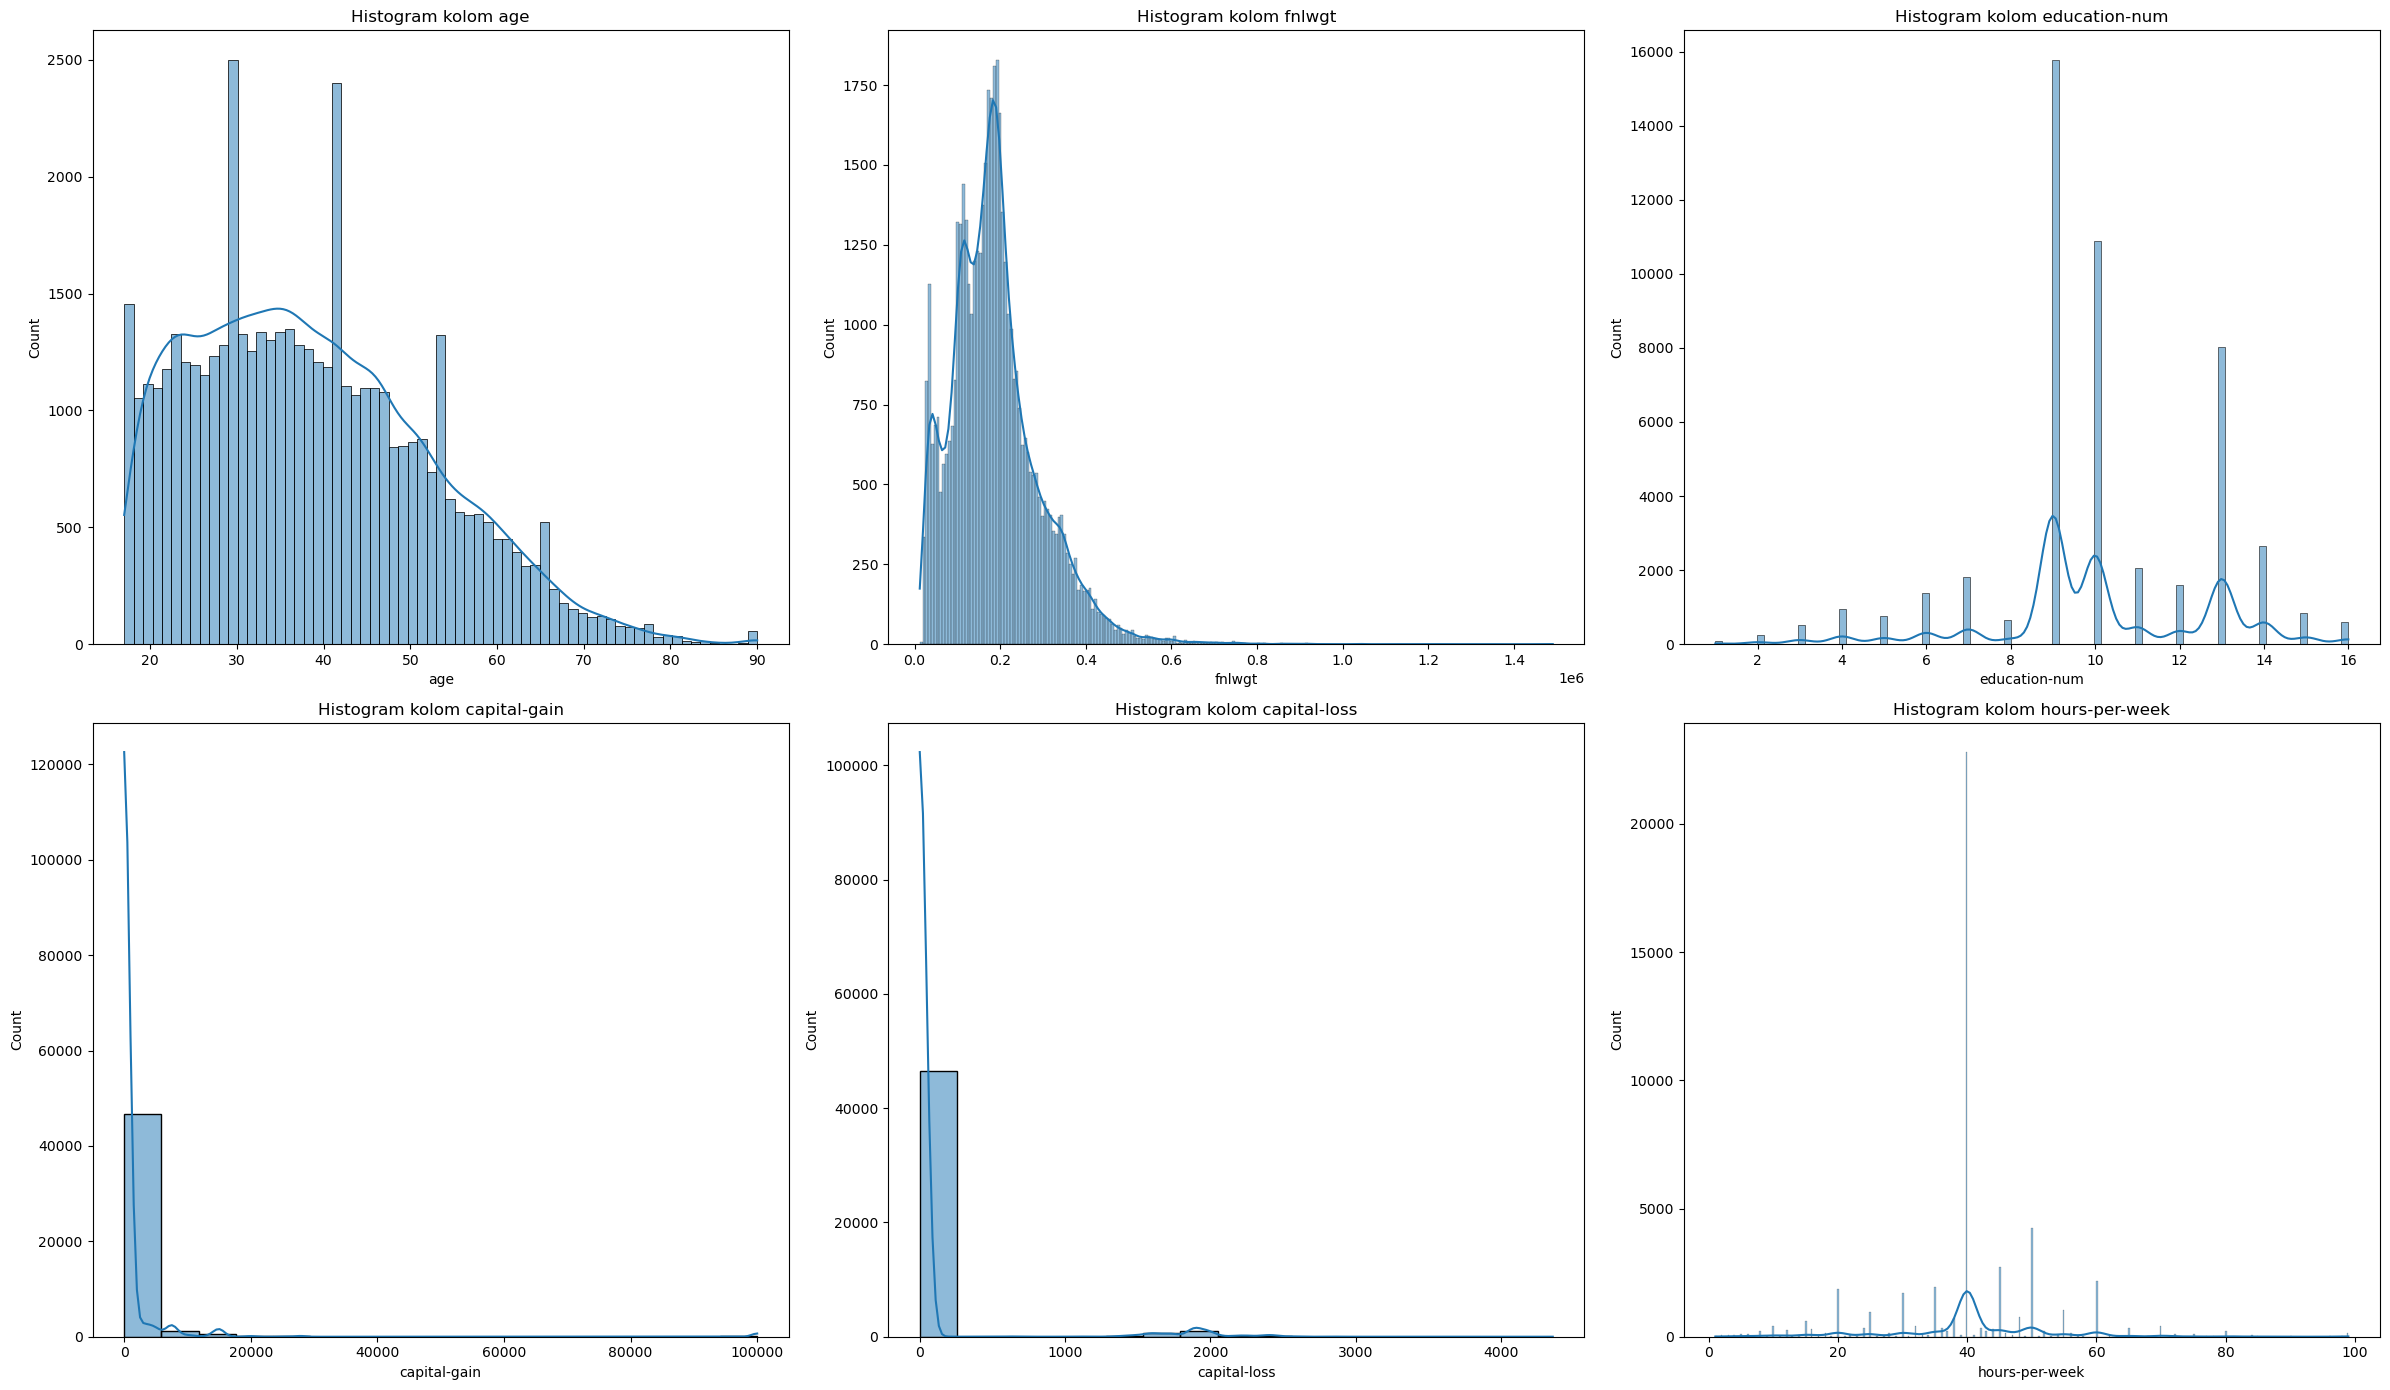

In [12]:
# Membuat DataFrame data yang hanya berjenis numerical
data_num = data.select_dtypes(include='number')

# Membuat plot berukuran 24x14
plt.figure(figsize=(24, 14))

# Iterasi melalui setiap kolom numerik dalam 'data_num'
for i, col in enumerate(data_num, 1):
    # Membuat subplot dengan ukuran 4 baris x 5 kolom dan mengambil nomor subplot ke-i
    plt.subplot(2, 3, i)
    # Membuat histogram dan KDE plot menggunakan seaborn untuk kolom numerik saat ini
    sns.histplot(data_num[col], kde=True)
    # Menambahkan judul untuk setiap subplot berdasarkan nama kolom
    plt.title(f'Histogram kolom {col}')

# Sesuaikan tata letak
plt.tight_layout()
plt.show()

Dari hasil deskripsi statistik yang telah dilakukan, kita dapat menemukan beberapa insight yang berguna:
- Distribusi umur (age) tampaknya cenderung condong ke kanan (skew positif), dengan nilai mean (rata-rata) sekitar 38 tahun dan median (nilai tengah) 37 tahun. Hal ini menunjukkan bahwa ada beberapa nilai umur yang lebih tinggi yang dapat menggeser rata-rata ke arah yang lebih tinggi.
- Distribusi Final Weight (fnlwgt) memiliki skewness positif yang tinggi, menunjukkan adanya ekor panjang di sisi kanan distribusi. Ini dapat mengindikasikan adanya outlier atau anomali dalam distribusi berat akhir.
- Kita akan menghirukan distribusi data education_num karena merupakan kategorial.
- Distribusi Capital-gain dan Capital-loss memiliki skewness yang tinggi, terutama capital-gain. Hal ini menunjukkan bahwa sebagian besar nilai cenderung berada pada tingkat yang lebih rendah, sementara ada beberapa nilai yang sangat tinggi yang dapat memengaruhi distribusi.
- Distribusi jam kerja per minggu (Hours-per-week) memiliki skewness yang kecil dan kurtosis yang moderat. Rata-rata jam kerja adalah sekitar 40 jam per minggu, dengan variasi yang lebih rendah.
- Distribusi yang mencerminkan skewness atau kurtosis tinggi dapat menunjukkan bahwa data memiliki variasi yang signifikan atau mungkin mengandung outlier.
- Perbedaan antara mean dan median (misalnya, pada age dan fnlwgt) dapat memberikan petunjuk tentang kehadiran outlier atau skewness dalam distribusi.

### **4.3. Melihat Unique Value**

Sebagai bentuk pemahaman akan data secara lebih dalam, kita akan melihat unique values dari kolom-kolom yang ada dalam dataset ini.

In [13]:
# Melihat banyak nya unique value
data.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [14]:
# Loop untuk setiap kolom
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: \n{unique_values}")
    print('')

Unique values in age: 
[39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

Unique values in workclass: 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked' nan]

Unique values in fnlwgt: 
[ 77516  83311 215646 ... 173449  89686 350977]

Unique values in education: 
['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']

Unique values in education-num: 
[13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

Unique values in marital-status: 
['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']

Unique values in occupation: 
['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' '

Kita temukan bahwa adalah kesalahan penulisan pada kolom income yang harus kita handle.

Selain itu, kita temukan juga adanya value 'nan' (missing value) dan '?' pada kolom-kolom yang mengalami missing value.

### **4.4. Memperbaiki value kolom income**

Kita akan memperbaiki penulisan pada kolom income.

In [15]:
# Mengganti data income yang memiliki '.'
data['income'] = data['income'].str.replace('<=50K.', '<=50K')
data['income'] = data['income'].str.replace('>50K.', '>50K')

### **4.5. Melihat dan memperbaiki data yang memiliki duplikat**

Berikutnya kita akan mengecek apakah ada data yang memiliki duplikat. Kita akan menggunakan method `.duplicated().sum()`

In [16]:
# Menghitung jumlah baris duplikat dalam dataset
duplicate_rows = data.duplicated().sum()

# Menghitung persentase data duplikat dari total panjang dataset
duplicate_percentage = (duplicate_rows / len(data)) * 100

# Menampilkan hasil
print("Jumlah baris duplikat dalam dataset:", duplicate_rows)
print("Persentase data duplikat dalam dataset:", duplicate_percentage)

Jumlah baris duplikat dalam dataset: 48
Persentase data duplikat dalam dataset: 0.09827607387084886


In [17]:
# Menampilkan data-data yang memiliki duplikat.
data[data.duplicated()]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


Melihat dari presentase data duplikat yang sangat kecil yaitu 0.098%, kita akan menghapus kolom duplikatnya karena jumlahnya yang sangat sedikit, tidak akan terlalu mengurangi informasi yang kita peroleh.

Kita akan langsung meng-handle data duplikat pada tahap EDA karena diperlukan untuk visualisasi data sebagai bentuk pemahaman data.

In [18]:
# Menghapus baris duplikat dari dataset
data = data.drop_duplicates()

### **4.6. Memeriksa missing value dan outlier**

Untuk memaksimalkan model pengelompokkan (clustering) yang kita buat, kita akan melakukam handling missing value dan juga outliers.

In [19]:
# Menghitung jumlah nilai yang hilang (missing values) untuk setiap kolom dalam dataset
missing_values = data.isnull().sum()

# Menghitung persentase nilai yang hilang dari total panjang dataset untuk setiap kolom
missing_value_percentage = (missing_values / len(data)) * 100

# Menghitung nilai kuartil pertama (Q1), kuartil ketiga (Q3), dan rentang interquartil (IQR) untuk setiap kolom numerik
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

# Menghitung batas bawah (lower_bound) dan batas atas (upper_bound) untuk deteksi outlier dengan metode IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghitung jumlah outlier untuk setiap kolom numerik menggunakan metode IQR
outliers = ((data < lower_bound) | (data > upper_bound)).sum()

# Menghitung persentase outlier dari total panjang dataset untuk setiap kolom numerik
outlier_percentage = (outliers / len(data)) * 100

# Membuat DataFrame yang berisi ringkasan hasil perhitungan, termasuk jumlah missing values, persentase missing values, jumlah outliers, dan persentase outliers untuk setiap kolom
summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Missing %': missing_value_percentage,
    'Outliers': outliers,
    'Outlier %': outlier_percentage
})

# Menampilkan ringkasan
summary

,Missing Values,Missing %,Outliers,Outlier %
age,0,0.000000,215,0.440628
capital-gain,0,0.000000,4035,8.269459
capital-loss,0,0.000000,2282,4.676805
education,0,0.000000,0,0.000000
education-num,0,0.000000,1787,3.662336
fnlwgt,0,0.000000,1453,2.977825
hours-per-week,0,0.000000,13486,27.638644
income,0,0.000000,0,0.000000
marital-status,0,0.000000,0,0.000000
native-country,274,0.561544,0,0.000000


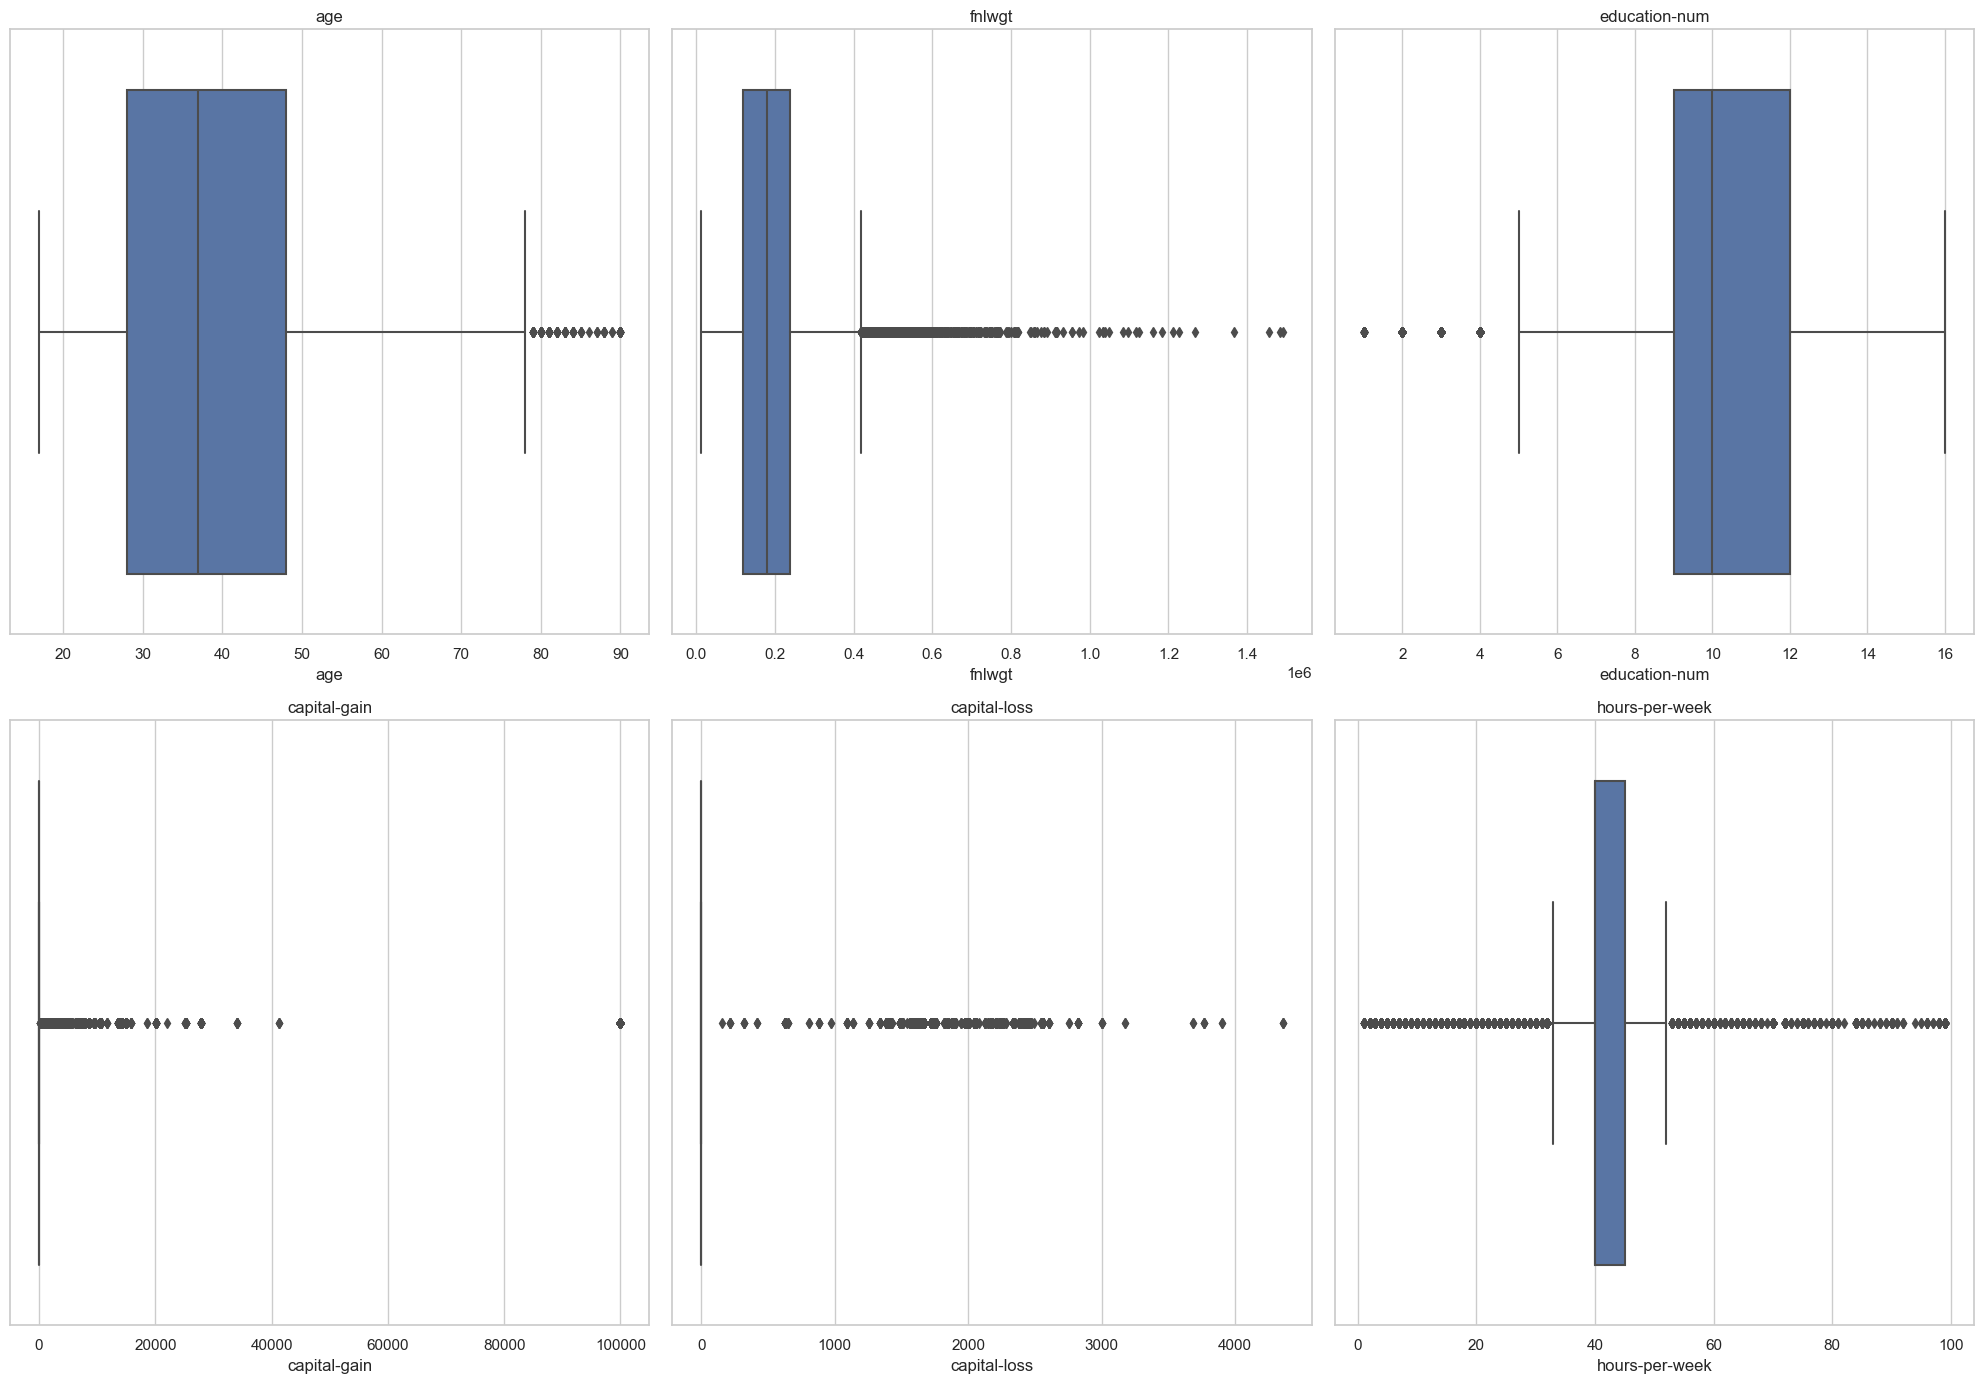

In [20]:
# Atur gaya untuk visualisasi
sns.set(style="whitegrid")

# Buat gambar dan sumbu untuk setiap kolom
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))

# Ratakan sumbu untuk memudahkan iterasi
axes = axes.flatten()

# Gambarkan setiap kolom
for i, column in enumerate(data_num.columns):
    sns.boxplot(x=data[column], ax=axes[i])
    axes[i].set_title(column)

# Sesuaikan tata letak
plt.tight_layout()
plt.show()

Dari hasil analisis yang telah dilakukan terhadap dataset, kita dapat menarik beberapa insight:

- Terdapat nilai yang hilang pada tiga kolom, yaitu 'native-country', 'occupation', dan 'workclass'. Kolom 'native-country' memiliki sekitar 0.56% nilai yang hilang, 'occupation' sekitar 1.98%, dan 'workclass' sekitar 1.97%. Pengelolaan nilai yang hilang pada ketiga kolom ini perlu dipertimbangkan untuk memastikan konsistensi dan keakuratan analisis data.
- Kolom 'age' memiliki sekitar 0.44% outliers, 'capital-gain' memiliki sekitar 8.26%, 'capital-loss' sekitar 4.67%, 'education-num' sekitar 3.67%, 'fnlwgt' sekitar 2.97%, dan 'hours-per-week' memiliki sekitar 27.63% outliers. Peningkatan yang signifikan dalam persentase outliers pada 'hours-per-week' menunjukkan bahwa sebagian besar data berada di luar rentang interquartil, dan perlu dipertimbangkan apakah ini adalah hasil yang diinginkan atau apakah ada kebutuhan untuk memeriksa dan membersihkan data tersebut. Outliers pada 'hours-per-week' mungkin dapat dijelaskan oleh keberagaman jam kerja yang luas dalam dataset. Meskipun 'capital-gain' dan 'capital-loss' memiliki persentase outliers yang tinggi, hal ini dapat diharapkan karena variabilitas besar dalam capital-gain dan capital-loss.

Dengan memahami nilai yang hilang dan outliers, Anda dapat membuat keputusan yang lebih baik dalam pemrosesan data lebih lanjut, termasuk strategi pengisian nilai yang hilang atau penanganan outliers sesuai dengan kebutuhan analisis atau model yang akan dibangun.

### **4.7. Melihat data yang mengandung missing value**

Setelah mengetahui bahwa missing value banyak terjadi pada kolom 'native-country', 'occupation', dan 'workclass', kita akan lihat, data apa saja yang mengalami missing value pada kolom-kolom tersebut untuk memahami lebih dalam dari penyebab missing value.

In [21]:
# Mencetak DataFrame hanya untuk baris yang memiliki nilai yang hilang pada kolom workclass
data[data['workclass'].isnull()].sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
42296,71,NaN,78786,7th-8th,4,Married-civ-spouse,NaN,Husband,White,Male,0,2149,24,United-States,<=50K
36251,20,NaN,322144,Some-college,10,Never-married,NaN,Not-in-family,White,Male,0,0,40,United-States,<=50K
44537,21,NaN,231511,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,20,United-States,<=50K
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K
35227,32,NaN,161288,9th,5,Married-civ-spouse,NaN,Husband,White,Male,0,0,45,United-States,<=50K
35974,44,NaN,177461,Some-college,10,Divorced,NaN,Unmarried,Amer-Indian-Eskimo,Male,0,0,50,United-States,<=50K
33899,20,NaN,228649,Some-college,10,Never-married,NaN,Own-child,White,Male,0,0,30,United-States,<=50K
34186,21,NaN,113760,HS-grad,9,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<=50K
43964,33,NaN,211743,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,21,United-States,<=50K
39174,20,NaN,243981,HS-grad,9,Never-married,NaN,Own-child,Black,Female,0,0,40,United-States,<=50K


In [22]:
# Mencetak DataFrame hanya untuk baris yang memiliki nilai yang hilang pada kolom occupation
data[data['occupation'].isnull()].sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32661,51,NaN,189762,Some-college,10,Married-civ-spouse,NaN,Wife,White,Female,0,0,18,United-States,<=50K
48239,22,NaN,148409,Some-college,10,Never-married,NaN,Own-child,White,Male,0,1721,40,United-States,<=50K
41397,22,NaN,48343,Some-college,10,Never-married,NaN,Other-relative,Black,Female,0,0,40,United-States,<=50K
36782,22,NaN,117789,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,40,United-States,<=50K
38210,19,NaN,272166,Some-college,10,Never-married,NaN,Own-child,White,Male,0,1602,30,United-States,<=50K
37556,49,NaN,141483,10th,6,Married-civ-spouse,NaN,Wife,White,Female,0,0,40,United-States,<=50K
42436,18,NaN,354236,10th,6,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
33956,65,NaN,101427,Bachelors,13,Married-civ-spouse,NaN,Husband,White,Male,2653,0,30,United-States,<=50K
47846,29,NaN,42623,HS-grad,9,Never-married,NaN,Not-in-family,White,Male,0,0,32,United-States,<=50K
46545,32,NaN,913447,HS-grad,9,Divorced,NaN,Not-in-family,Black,Female,0,0,40,United-States,<=50K


In [23]:
# Mencetak DataFrame hanya untuk baris yang memiliki nilai yang hilang pada kolom native-country
data[data['native-country'].isnull()].sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
41975,30,Private,173858,HS-grad,9,Never-married,Craft-repair,Not-in-family,Asian-Pac-Islander,Male,2597,0,40,NaN,<=50K
34721,28,NaN,243190,Bachelors,13,Never-married,NaN,Not-in-family,Asian-Pac-Islander,Male,0,0,30,NaN,<=50K
37203,37,Private,474568,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,45,NaN,>50K
41918,31,Private,165503,11th,7,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,NaN,<=50K
34392,41,Self-emp-inc,244172,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,NaN,>50K
47575,36,Private,303187,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,0,0,44,NaN,>50K
41996,63,Private,181153,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
46135,34,Self-emp-not-inc,195891,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,NaN,>50K
46531,41,Private,405172,Assoc-acdm,12,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,NaN,>50K
45285,38,Self-emp-not-inc,164593,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Male,0,0,30,NaN,<=50K


Dari data yang memiliki nilai yang hilang, kita dapat mengamati beberapa insight:

<br>1. **Polanya Terlihat:**
   - Tampaknya terdapat beberapa pola dalam data yang memiliki nilai yang hilang. Sebagai contoh, pada beberapa baris tertentu, 'workclass' dan 'occupation' hilang secara bersamaan. Hal ini mungkin menunjukkan adanya keterkaitan atau pola tertentu di antara kolom-kolom ini. Data ini mungkin mewakili mereka yang tidak bekerja.

<br>2. **Variasi di Beberapa Kolom:**
   - Beberapa baris memiliki nilai yang hilang hanya pada kolom tertentu, seperti pada baris 32580 di mana 'native-country' hilang. Ini menunjukkan variasi dalam lokasi data yang hilang.

<br>3. **Potensi Keterkaitan dengan Karakteristik Lain:**
   - Pada beberapa baris, data yang hilang mungkin berkaitan dengan karakteristik tertentu. Sebagai contoh, pada baris 32583, seorang wanita berusia 72 tahun yang bercerai memiliki nilai yang hilang pada 'workclass' dan 'occupation'.

<br>Berdasarkan pengamatan ini, sulit untuk dengan pasti menyimpulkan apakah data yang hilang tergolong Missing Completely at Random (MCAR), Missing at Random (MAR), atau Missing Not at Random (MNAR). Terdapat pola yang dapat mengindikasikan keterkaitan dengan variabel lain, tetapi analisis lebih lanjut mungkin diperlukan untuk menentukan apakah pola ini signifikan secara statistik.

### **4.8. Melihat data mengalami anomali**

Kita akan melihat data-data yang memiliki value '?' pada dataset kita.

In [24]:
# Mencetak DataFrame hanya untuk baris yang memiliki nilai yang hilang pada kolom native-country
data[data['workclass'] == '?'].sample(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
11085,28,?,80165,Some-college,10,Divorced,?,Not-in-family,White,Female,0,0,30,United-States,<=50K
3211,82,?,29441,7th-8th,4,Widowed,?,Not-in-family,White,Male,0,0,5,United-States,<=50K
20877,48,?,112860,10th,6,Married-civ-spouse,?,Wife,Black,Female,0,0,35,United-States,<=50K
19433,59,?,367984,Bachelors,13,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K
5720,28,?,55950,Bachelors,13,Never-married,?,Own-child,Black,Female,0,0,40,Germany,<=50K
27518,62,?,125493,HS-grad,9,Married-civ-spouse,?,Wife,White,Female,5178,0,40,Scotland,>50K
29798,32,?,119522,Bachelors,13,Divorced,?,Not-in-family,White,Male,0,0,50,United-States,<=50K
11526,18,?,28357,Some-college,10,Never-married,?,Own-child,White,Female,0,0,20,United-States,<=50K
734,45,?,51164,Some-college,10,Married-civ-spouse,?,Wife,Black,Female,0,0,40,United-States,<=50K
16490,72,?,173427,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,Cuba,<=50K


In [25]:
# Menghitung jumlah baris dengan nilai '?' pada kolom 'workclass'
workclass_missing_count = (data['workclass'] == '?').sum()
workclass_missing_percentage = (workclass_missing_count / len(data)) * 100

# Menghitung jumlah baris dengan nilai '?' pada kolom 'occupation'
occupation_missing_count = (data['occupation'] == '?').sum()
occupation_missing_percentage = (occupation_missing_count / len(data)) * 100

# Menghitung jumlah baris dengan nilai '?' pada kolom 'native-country'
native_country_missing_count = (data['native-country'] == '?').sum()
native_country_missing_percentage = (native_country_missing_count / len(data)) * 100

# Menampilkan hasil
print("Jumlah baris dengan nilai '?' pada kolom 'workclass':", workclass_missing_count)
print("Persentase baris dengan nilai '?' pada kolom 'workclass':", workclass_missing_percentage)

print("\nJumlah baris dengan nilai '?' pada kolom 'occupation':", occupation_missing_count)
print("Persentase baris dengan nilai '?' pada kolom 'occupation':", occupation_missing_percentage)

print("\nJumlah baris dengan nilai '?' pada kolom 'native-country':", native_country_missing_count)
print("Persentase baris dengan nilai '?' pada kolom 'native-country':", native_country_missing_percentage)

Jumlah baris dengan nilai '?' pada kolom 'workclass': 1836
Persentase baris dengan nilai '?' pada kolom 'workclass': 3.7627577161126364

Jumlah baris dengan nilai '?' pada kolom 'occupation': 1843
Persentase baris dengan nilai '?' pada kolom 'occupation': 3.777103742263393

Jumlah baris dengan nilai '?' pada kolom 'native-country': 582
Persentase baris dengan nilai '?' pada kolom 'native-country': 1.1927696028200188


Setelah kita selidiki lebih lanjut, kita temukan bahwa bahwa ada data yang missing value atau juga bernilai '?'. Missing value yang terjadi memiliki pattern tertentu dimana jika seseorang tidak menuliskan pekerjaan mereka (occupation), maka tidak akan memiliki kelas pekerja (workclass). Bisa kita simpulkan bahwa missing value disini adalah MNAR (Missing Not At Random).

Mayoritas dari mereka yang memiliki data missing value ataupun '?' tidak memiliki capital gain dan capital loss namun memiliki working hour per week. Dapat kita asumsikan bahwa mereka yang tidak memiliki pekerjaan, ataupun merahasiakan data mereka.

Karena jumlahnya yang sedikit dibandingkan dengan seluruh datanya, maka aman untuk kita untuk lakukan handling dengan cara men-drop kolom yang mengandung missing value dan '?' karena kita tetap akan mendapatkan informasi yang sangat banyak untuk dipelajari oleh model.

Kita juga menghandlingnya dengan drop dan bukan imputasi karena datanya tidak memungkinkan untuk digunakan karena berpotensi merusak model dimana kita ingin memprediksi income dan BUKAN mencari penyebab missing value.

Kita akan lakukan ini pada tahap EDA karena kita perlukan untuk visualisasi pemahaman data.

In [26]:
# Menghapus rows yang memiliki missing value
data.dropna(inplace=True)

# Mendrop baris dengan nilai '?' pada kolom 'workclass' dan 'occupation'
data = data[(data['workclass'] != '?') & (data['occupation'] != '?') & (data['native-country'] != '?')]

### **4.9. Melihat Perbandingan Data Berdasarkan Nilai Income**

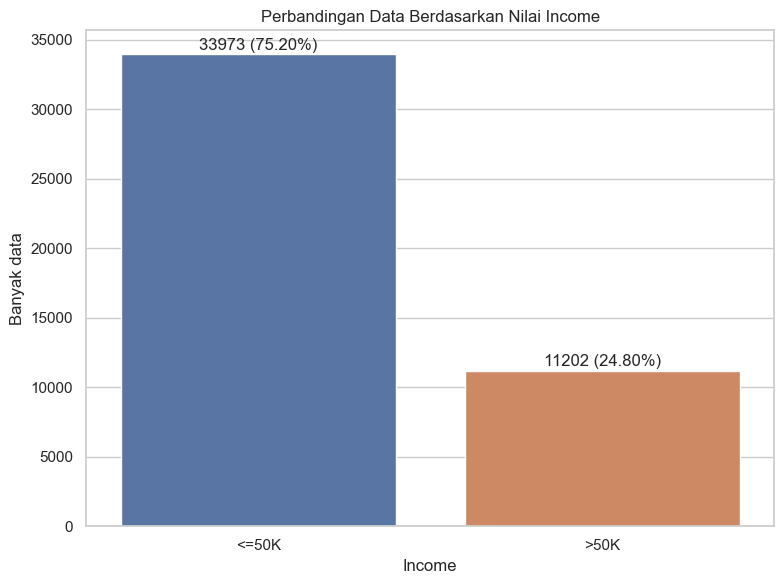

In [27]:
# Mengelompokkan data berdasarkan nilai kolom 'income' dan menghitung jumlahnya
income_counts = data['income'].value_counts()

# Menghitung persentase masing-masing nilai 'income'
income_percentages = (income_counts / len(data)) * 100

# Membuat plot bar untuk perbandingan
plt.figure(figsize=(8, 6))
sns.countplot(x='income', data=data)

# Menambahkan label dan judul
plt.xlabel('Income')
plt.ylabel('Banyak data')
plt.title('Perbandingan Data Berdasarkan Nilai Income')

# Menampilkan label jumlah dan persentase pada setiap bar
for i, value in enumerate(income_counts):
    plt.text(i, value + 100, f'{value} ({income_percentages[i]:.2f}%)', ha='center', va='bottom')

# Menampilkan plot
plt.tight_layout()
plt.show()

Kita temukan bahwa pada dataset yang kita gunakan, mereka dengan besaran income lebih sedikit atau sama dengan $50,000 per tahun jauh lebih banyak (75.19%) dibandingkan mereka yang diatas nominal tersebut (24.82%).

### **4.9. Melihat Distribusi Umur**

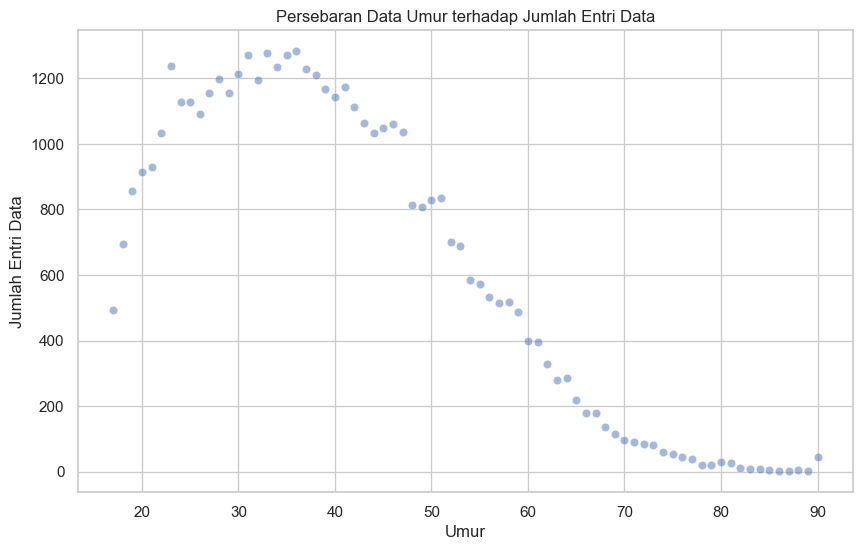

In [28]:
# Menghitung jumlah entri data untuk setiap umur
age_entry_count = data['age'].value_counts().reset_index()
age_entry_count.columns = ['age', 'entry_count']

# Membuat scatterplot untuk persebaran data umur terhadap jumlah entri data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='entry_count', data=age_entry_count, alpha=0.5)

# Menambahkan label dan judul
plt.xlabel('Umur')
plt.ylabel('Jumlah Entri Data')
plt.title('Persebaran Data Umur terhadap Jumlah Entri Data')

# Menampilkan plot
plt.show()

Melihat dari grafik diatas, kita temukan bahwa pada dataset kita umurnya berkisar antara 17 hingga 90 tahun dengan mayoritas data antara usia 25 dan 50 tahun.

### **4.10. Melihat Banyak Data Grup Umur dengan Income**

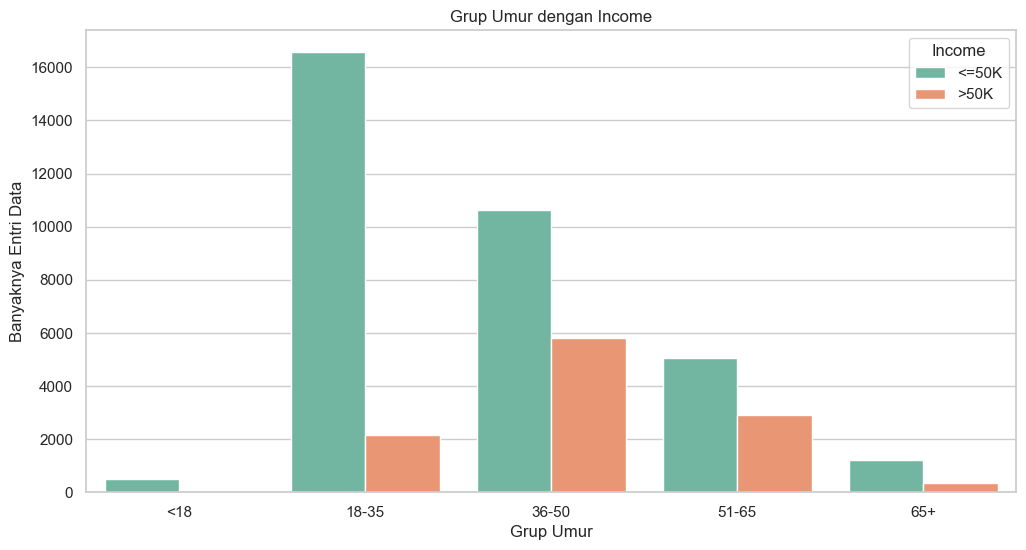

In [29]:
# Membuat kolom baru 'age_group' berdasarkan kategori umur
bins = [0, 18, 35, 50, 65, 100]
labels = ['<18', '18-35', '36-50', '51-65', '65+']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='age_group', hue='income', data=data, palette='Set2')

# Menambahkan label dan judul
plt.xlabel('Grup Umur')
plt.ylabel('Banyaknya Entri Data')
plt.title('Grup Umur dengan Income')

# Menampilkan legenda
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])

# Menampilkan plot
plt.show()

# Menghapus kolom 'age_group'
data = data.drop('age_group', axis=1)

Melihat grafik tersebut, kita dapat melihat bahwa terdapat perbedaan yang signifikan antara rasio >50 ribu hingga <=50 ribu antar kelompok umur.

Rasion yang menarik ada pada 36-50 dan 51-65 dimana kemungkinan orang memiliki gaji >50K/ tahun lumayan besar dibanding kelompok umur lainnya.

Kita juga temukan bahwa mayortas responden adalah mereka yang berusia 18-50+.

### **4.11. Melihat Banyak Data Setiap Jenis Education**

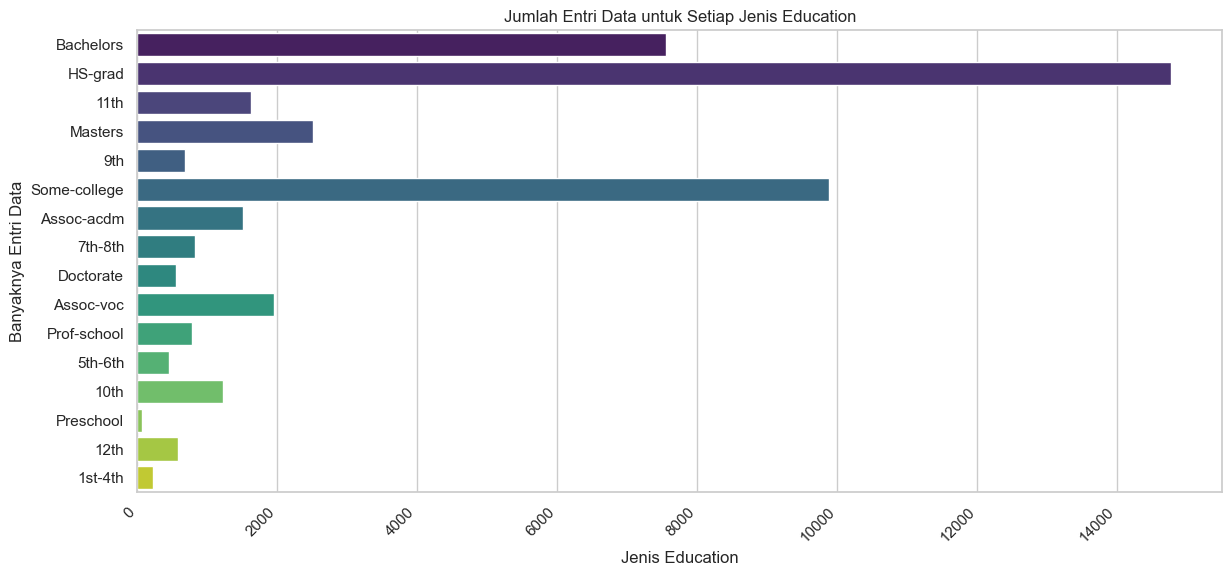

In [30]:
# Membuat bar chart untuk menampilkan jumlah entri data untuk setiap jenis education
plt.figure(figsize=(14, 6))
sns.countplot(y='education', data=data, palette='viridis')

# Menambahkan label dan judul
plt.xlabel('Jenis Education')
plt.ylabel('Banyaknya Entri Data')
plt.title('Jumlah Entri Data untuk Setiap Jenis Education')

# Menampilkan plot
plt.xticks(rotation=45, ha='right')  # Rotasi label sumbu x agar lebih mudah dibaca
plt.show()

Statistik di atas menunjukkan distribusi berbagai tingkat pendidikan di antara individu-individu dalam kumpulan data.

Kita temukan bahwa banyak dari data yang kita miliki hanyalah tamatan SMA, diikuti oleh college dan sarjana (bachelors).

### **4.12. Melihat Perbandingan Income Berdasarkan Workclass**

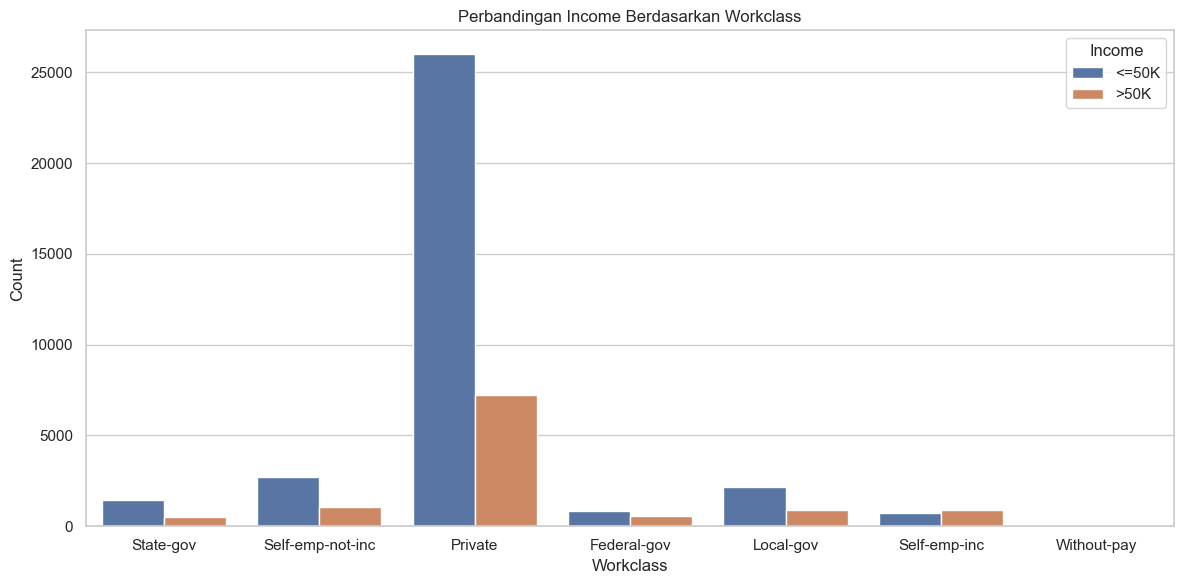

In [31]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='workclass', hue='income', data=data)

# Menambahkan label dan judul
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Perbandingan Income Berdasarkan Workclass')

# Menampilkan legenda
plt.legend(title='Income', loc='upper right')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

Statistik diatas menggambarkan perbandingan income berdasarkan kelas pekerja.

Kita temukan bahwa mayoritas didata kita memiliki workclass bertipe private (bekerja di private sector).

Probilitas untuk mendapatkan gaji diatas $50K/ tahun lumayan besar jika bekerja dalam kelas pekerja self-emp-inc.

### **4.13. Melihat Perbandingan Income Berdasarkan Occupation**

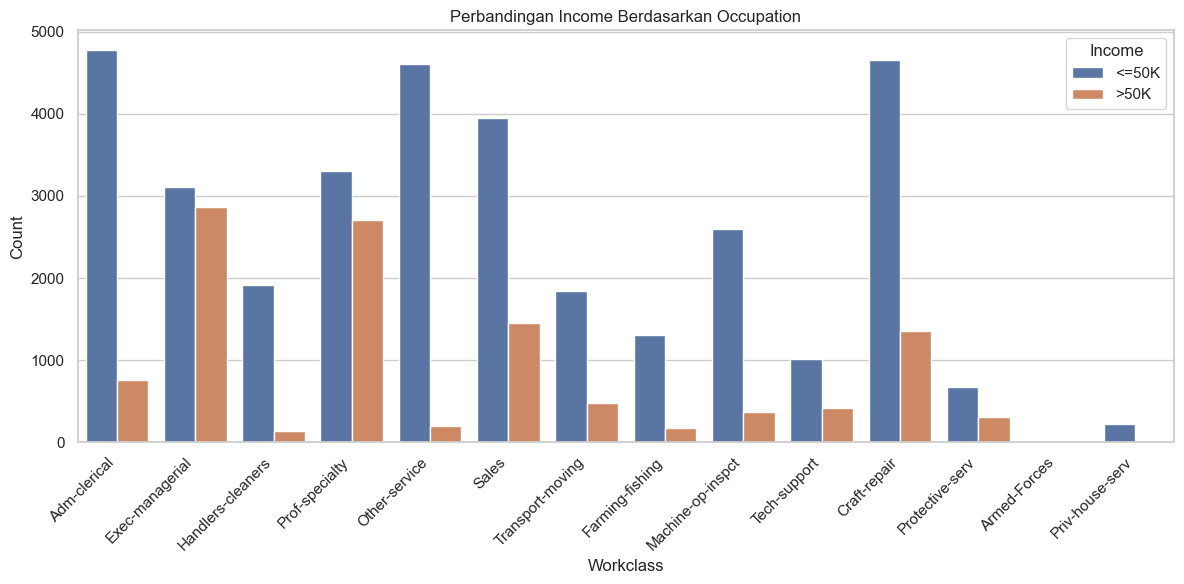

In [32]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
chart = sns.countplot(x='occupation', hue='income', data=data)

# Memutar label x sebesar 45 derajat
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

# Menambahkan label dan judul
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Perbandingan Income Berdasarkan Occupation')

# Menampilkan legenda
plt.legend(title='Income', loc='upper right')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari statistik diatas, Exec-managerial dan prof-specialty menonjol karena memiliki persentase individu yang menghasilkan lebih dari $50.000/ tahun yang sangat tinggi.

Selain itu, persentase untuk Farmingfishing, Otherservice, dan Handlerscleaner untuk mendapatkan income lebih dari $50.000/tahun jauh lebih rendah dibandingkan profesi lainnya.

### **4.14. Melihat Perbandingan Income Berdasarkan Gender**

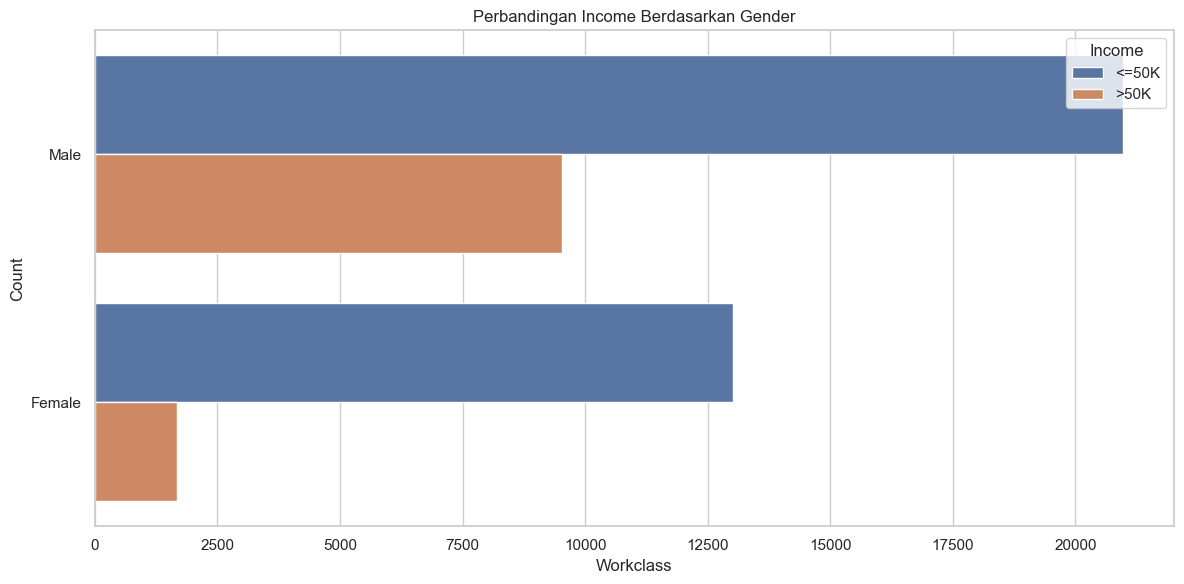

In [33]:
# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.countplot(y='sex', hue='income', data=data)

# Menambahkan label dan judul
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Perbandingan Income Berdasarkan Gender')

# Menampilkan legenda
plt.legend(title='Income', loc='upper right')

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan plot
plt.show()

Dari statistik diatas, kita temukan bahwa pekerja pria memiliki peluang lebih besar untuk mendapatkan gaji diatas $50.000 per tahunnya dibandingkan dengan perempuan. Kita lihat juga bahwa mayoritas data yang kita miliki berisi pria.

### **4.15. Melihat Perbandingan Income Berdasarkan Hours-Per-Week**

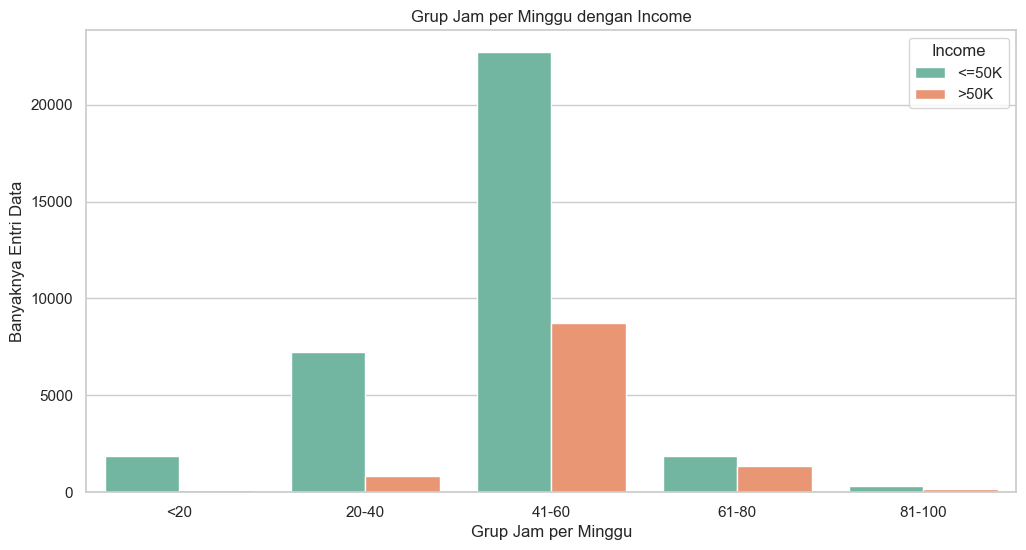

In [34]:
# Membuat kolom baru 'hour_group' berdasarkan kategori jam per minggu
hour_bins = [0, 20, 40, 60, 80, 100]
hour_labels = ['<20', '20-40', '41-60', '61-80', '81-100']
data['hour_group'] = pd.cut(data['hours-per-week'], bins=hour_bins, labels=hour_labels, right=False)

# Membuat bar chart
plt.figure(figsize=(12, 6))
sns.countplot(x='hour_group', hue='income', data=data, palette='Set2')

# Menambahkan label dan judul
plt.xlabel('Grup Jam per Minggu')
plt.ylabel('Banyaknya Entri Data')
plt.title('Grup Jam per Minggu dengan Income')

# Menampilkan legenda
plt.legend(title='Income', loc='upper right', labels=['<=50K', '>50K'])

# Menampilkan plot
plt.show()

# Menghapus kolom 'hour_group'
data = data.drop('hour_group', axis=1)

Statistik diatas menunjukkan bahwa dataset kita mayoritas berisikan mereka yang bekerja 41-60 jam per minggu.

Presentase jumlah dari mereka yang memiliki income diatas $50.000 per tahun juga sangat besar.

### **4.16. Melihat korelasi data-data kategorial terhadap income**

Untuk melakukan uji korelasi data-data lokasi terhadap pendapatan (income), kita harus `memastikan tipe datanya terlebih dahulu`.

Tipe data yang digunakan terdiri dari dua jenis yang berbeda, yaitu kategori dan numerical.

Metode uji korelasi yang digunakan adalah `metode PhiX`.

Berikut adalah uji korelasi beserta visualisasinya:

<Axes: >

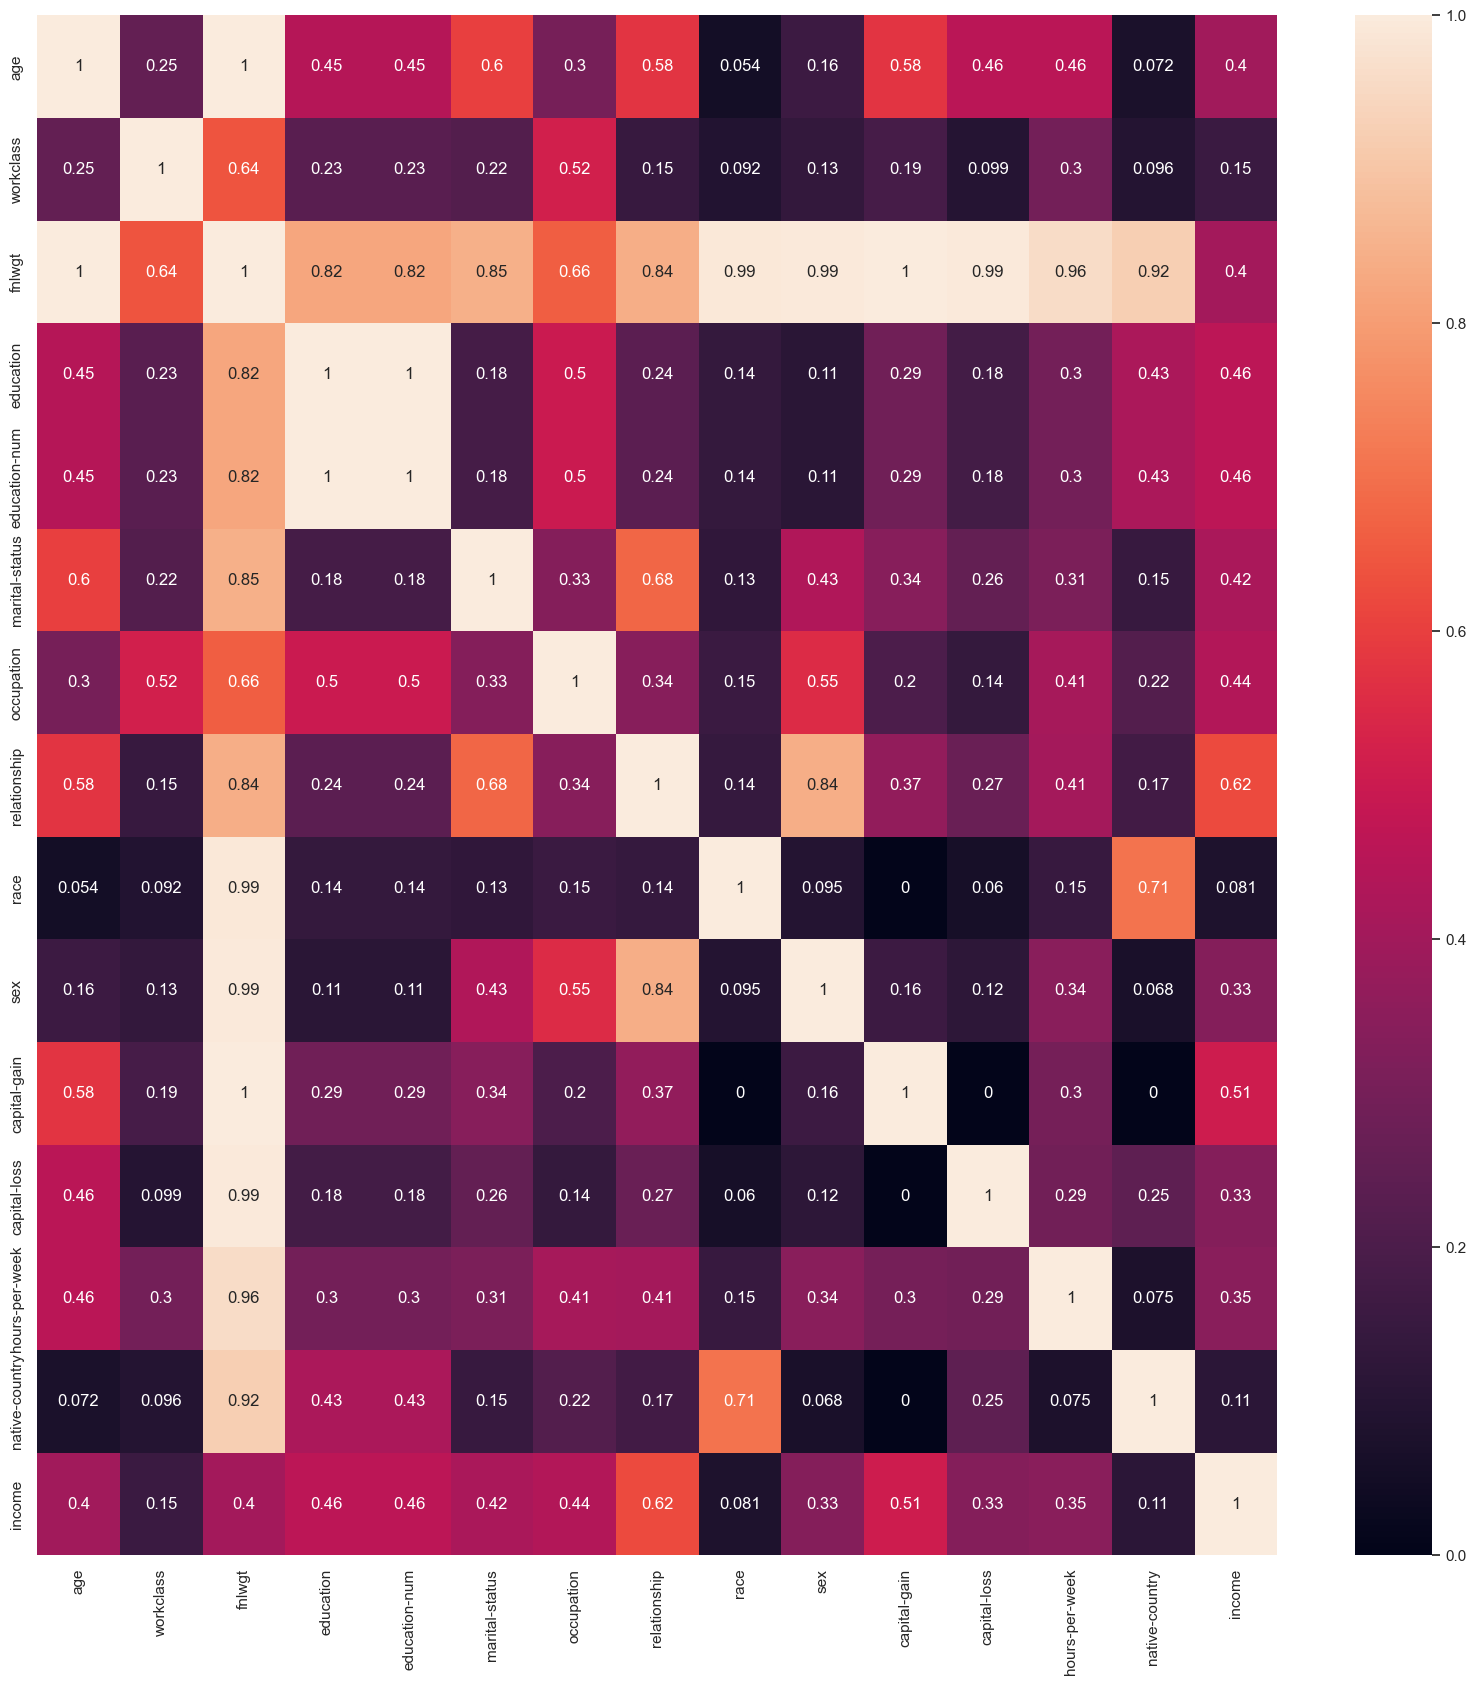

In [35]:
# Memilih kolom kategorial
data_korelasi = data

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom 'income'
data_korelasi['income'] = label_encoder.fit_transform(data_korelasi['income'])

# Menentukan kolom interval untuk perhitungan matriks phik
interval_cols = ['income']

# Menghitung matriks phik untuk korelasi variabel kategorikal dan numerikal
phik_overview = data_korelasi.phik_matrix(interval_cols=interval_cols)

# Menampilkan heatmap matriks phik dengan anotasi nilai
plt.figure(figsize=(20, 20))
sns.heatmap(phik_overview, annot=True)

Dari hasil visualisasi diatas kita memperoleh korelasi terhadap income seperti berikut:
- age (0.4)
- workclass (0.15)
- fnlwgt (0.4)
- education (0.46)
- marital-status (0.42)
- occupation (0.44)
- relationship (0.62)
- race (0.082)
- sex (0.33)
- capital-gain (0.51)
- capital-loss (0.34)
- hours-per-week (0.34)
- native-country (0.12)

Berdasarkan hasil uji korelasi menggunakan phix, kita akan mendrop kolom yang nilai korelasinya sangat jauh dibawah rata-rata seperti kolom race (0.082).

Berdasarkan domain knowledge, kita tidak memerlukan data seperti final weight dan relationship. Umumnya, yang mempengaruhi income hanya marital status dan bukan relationship.

Kita juga tidak akan menggunakan kolom education karena sudah diwakili oleh education-num yang merupakan Ordinal sejak awal.

Melihat dari data capital gain dan capital loss yang banyak bernilai 0 yang kemungkinan karena dirahasiakan oleh responden, maka kita tidak akan menggunakan kolom ini.

---
## **5. Feature Engineering**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

### **5.1. Feature Transformation**

Dari hasil pengecekan pada EDA, kita temukan bahwa pada kolom kategorial, terdapat banyak sekali kolom dengan high cardinality.

Kita akan meng-handle ini dengan melakukan grouping.

In [36]:
# Mengelompokkan data 'marital-status'
data['marital-status'] = data['marital-status'].replace({
    'Married-civ-spouse':'Married', 
    'Married-spouse-absent':'Married',
    'Married-AF-spouse':'Married',
    'Never-married':'Single',
    'Divorced':'Separated',
    'Widowed':'Separated'
})

In [37]:
# Mengelompokkan data 'marital-status'
data['education'] = data['education'].replace({
    'Bachelors': 'High_Education',
    'HS-grad': 'High_Education',
    '11th': 'Low_Education',
    'Masters': 'High_Education',
    '9th': 'Low_Education',
    'Some-college': 'High_Education',
    'Assoc-acdm': 'High_Education',
    'Assoc-voc': 'High_Education',
    '7th-8th': 'Low_Education',
    'Doctorate': 'High_Education',
    'Prof-school': 'High_Education',
    '5th-6th': 'Low_Education',
    '10th': 'Low_Education',
    '1st-4th': 'Low_Education',
    'Preschool': 'Low_Education',
    '12th': 'Low_Education'
})

In [38]:
# Mengelompokkan data 'occuupation'
data['occupation'] = data['occupation'].replace({
    'Adm-clerical':'Office',
    'Exec-managerial':'Management',
    'Handlers-cleaners':'Service',
    'Prof-specialty':'Professional',
    'Other-service':'Service',
    'Sales':'Other',
    'Craft-repair':'Other',
    'Transport-moving':'Other',
    'Farming-fishing':'Other',
    'Machine-op-inspct':'Other',
    'Tech-support':'Service',
    'Protective-serv':'Service',
    'Armed-Forces':'Other',
    'Priv-house-serv':'Service'
})

In [39]:
# Mengelompokkan data 'native-country' menjadi kontinen
data['native-continent'] = data['native-country'].replace({
    'United-States': 'North America',
    'Cuba': 'North America',
    'Jamaica': 'North America',
    'India': 'Asia',
    'Mexico': 'North America',
    'Puerto-Rico': 'North America',
    'Honduras': 'North America',
    'England': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Poland': 'Europe',
    'Columbia': 'South America',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Ecuador': 'South America',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'Haiti': 'North America',
    'Portugal': 'Europe',
    'Dominican-Republic': 'North America',
    'El-Salvador': 'North America',
    'France': 'Europe',
    'Guatemala': 'North America',
    'Italy': 'Europe',
    'China': 'Asia',
    'South': 'South America',
    'Japan': 'Asia',
    'Yugoslavia': 'Europe',
    'Peru': 'South America',
    'Outlying-US(Guam-USVI-etc)': 'Other',
    'Scotland': 'Europe',
    'Trinadad&Tobago': 'North America',
    'Greece': 'Europe',
    'Nicaragua': 'North America',
    'Vietnam': 'Asia',
    'Hong': 'Asia',
    'Ireland': 'Europe',
    'Hungary': 'Europe',
    'Holand-Netherlands': 'Europe'
})

# Menghapus kolom 'native-country' yang diganti dengan kolom 'continent'
data.drop(columns='native-country', inplace= True)

### **5.2. Feature Selection**

Dari hasil EDA, kita telah mengetahui ingin menggunakan kolom apa saja untuk model kali ini. Kita akan membuat DataFrame baru dengan kolom-kolom pilihan hasil EDA.

In [40]:
# Memilih kolom tertentu setelah EDA
data_after_eda = data[['age', 'workclass', 'education', 'marital-status', 
                       'occupation', 'sex', 'hours-per-week', 'native-continent', 'income']]

In [41]:
# Loop untuk setiap kolom
for column in data_after_eda.columns:
    unique_values = data_after_eda[column].unique()
    print(f"Unique values in {column}: \n{unique_values}")
    print('')

Unique values in age: 
[39 50 38 53 28 37 49 52 31 42 30 23 32 34 25 43 40 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 47 46 36 79 27 18 33 76 55 61 70 64 71 66 51 58
 26 17 60 90 75 65 77 62 63 67 74 72 69 68 73 81 78 88 80 84 83 85 82 86
 89 87]

Unique values in workclass: 
['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']

Unique values in education: 
['High_Education' 'Low_Education']

Unique values in marital-status: 
['Single' 'Married' 'Separated']

Unique values in occupation: 
['Office' 'Management' 'Service' 'Professional' 'Other']

Unique values in sex: 
['Male' 'Female']

Unique values in hours-per-week: 
[40 13 16 45 50 80 30 35 60 20 52 44 15 25 43 38 55 48 58 32 70 22 56 41
 28 36 24 46  2 42 12 65  1 34 75 98 33 54 10  6 64 19 18 72  8  9 47 37
 21 26 14  5  7 99 53 39 62 59 57 78 90 66 11 49 84 17 68  3 27 85 31 51
 77 63 23  4 87 88 73 89 97 94 29 96 67 82 86 91 81 76 92 61 74 95 79 69]

Unique values in native-conti

In [42]:
data_after_eda

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-continent,income
0,39,State-gov,High_Education,Single,Office,Male,40,North America,0
1,50,Self-emp-not-inc,High_Education,Married,Management,Male,13,North America,0
2,38,Private,High_Education,Separated,Service,Male,40,North America,0
3,53,Private,Low_Education,Married,Service,Male,40,North America,0
4,28,Private,High_Education,Married,Professional,Female,40,North America,0
...,...,...,...,...,...,...,...,...,...
48836,33,Private,High_Education,Single,Professional,Male,40,North America,0
48837,39,Private,High_Education,Separated,Professional,Female,36,North America,0
48839,38,Private,High_Education,Married,Professional,Male,50,North America,0
48840,44,Private,High_Education,Separated,Office,Male,40,North America,0


### **5.3. Feature Data Splitting**

##### **5.3.1. Split menjadi X (features) and y (target)**

Untuk membuat model machine learning, kita perlu membagi data menjadi dua bagian yaitu yang ingin kita prediksi/ target (y) dan yang untuk memprediksi/ fitur (X)

In [43]:
# Splitting between X and y

# Memisahkan variabel independen (fitur) dan variabel dependen (target)
X = data_after_eda.drop(['income'], axis=1)
y = data_after_eda['income']

In [44]:
# Menampilkan variabel independen (fitur) X
X

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-continent
0,39,State-gov,High_Education,Single,Office,Male,40,North America
1,50,Self-emp-not-inc,High_Education,Married,Management,Male,13,North America
2,38,Private,High_Education,Separated,Service,Male,40,North America
3,53,Private,Low_Education,Married,Service,Male,40,North America
4,28,Private,High_Education,Married,Professional,Female,40,North America
...,...,...,...,...,...,...,...,...
48836,33,Private,High_Education,Single,Professional,Male,40,North America
48837,39,Private,High_Education,Separated,Professional,Female,36,North America
48839,38,Private,High_Education,Married,Professional,Male,50,North America
48840,44,Private,High_Education,Separated,Office,Male,40,North America


In [45]:
# Menampilkan variabel dependen (target) y
y

0        0
1        0
2        0
3        0
4        0
        ..
48836    0
48837    0
48839    0
48840    0
48841    1
Name: income, Length: 45175, dtype: int32

##### **5.3.2. Split between Train-Set and Test-Set**

Kemudian setelah dipisah menjadi fitur (X) dan target (y), kita akan memisahkan kembali masing-masingnya menjadi data train (digunakan oleh model untuk belajar) dan data test (digunakan oleh model sebagai data uji/ test)

In [46]:
# Splitting between train and test

# Memisahkan data menjadi set pelatihan (train) dan set pengujian (test)
# Dengan rasio 80:20 dan seed (random_state) 42 untuk hasil yang dapat direproduksi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Menampilkan bentuk (shape) dari set pelatihan dan set pengujian
print('X-train', X_train.shape)
print('X-Test', X_test.shape)

X-train (36140, 8)
X-Test (9035, 8)


### **5.4. Melakukan pengecekan Multicollinearity**

Multikolinearitas/ Multicollinearity adalah fenomena ketika sejumlah variabel independen berkorelasi kuat.

Untuk mengahsilkan model yang baik dan menghasilkan hasil prediksi yang maksimal, selain dari korelasi independe dengan dependen harus kuat, korelasi antar independen haruslah tidak ada atau hanya sedikit.

Hal ini penting karena kita akan mencari tahu variabel/ fitur apa yang mengakibatkan atau bertanggung jawab terhadap perubahan variabel dependen.

In [47]:
# Menyeleksi kolom-kolom numerik dari data setelah proses exploratory data analysis (EDA)
vif_data = data_after_eda.select_dtypes(include='number')

# Menghitung Variance Inflation Factor (VIF) untuk setiap kolom numerik
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]

# Menambahkan kolom "predictor" yang berisi nama-nama kolom numerik
vif["predictor"] = vif_data.columns

# Mengurutkan hasil VIF secara menurun
vif.sort_values(by="vif", ascending=False, inplace=True)

# Menampilkan hasil VIF dengan kolom "predictor" dan "vif" yang diurutkan
display(vif.sort_values(by="vif", ascending=False))

,vif,predictor
0,6.419321,age
1,6.377222,hours-per-week
2,1.427044,income


Dari hasil uji multicolonearity, kita temukan ada 2 kolom yang memiliki skor VIF lebih dari 10. Mesk begitu, kita tidak akan mendropnya karena korelasinya yang besar dan skor VIF-nya hanya lebih besar sedikit dari 10.

### **5.5. Handling Outliers**

Kita akan melakukan handling outliers menggunakan `metode Winsorizer`.

Winsorizing digunakan untuk menangani outlier dalam data dengan menggantikan atau memotong nilai-nilai ekstrem, sehingga mempertahankan informasi esensial tanpa gangguan dari outlier. Ini membantu menjaga stabilitas analisis data dan distribusinya.

Kita akan mengaplikasikan transformasi Winsorizer ke dalam dataset latihan (X_train) dan dataset test (X_test). Alasan mengapa kita lakukan ke kedua data tersebut (train dan test) adalah sebagai bentuk menjaga konsistensi.

Kolom yang akan kita berikan handling outliers adalah `kolom 'hours-per-week'`.

Alasan kolom numerical lain seperti 'age' dan 'education-num' tidak di handle outliers meskipun memilikinya adalah karena outliers pada kolom ini kita asumsikan sebagai natural outliers (logis).

In [48]:
# Menggunakan Winsorizer dengan parameter tertentu
winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables='hours-per-week')

# Melatih Winsorizer menggunakan data latihan (X_train)
winsorizer.fit(X_train)

# Mengaplikasikan transformasi Winsorizer ke dalam dataset latihan (X_train) dan dataset test (X_test)
X_train = winsorizer.transform(X_train)
X_test = winsorizer.transform(X_test)

Setelah kita handling outliers, kita akan meninjau kembali bagaimana distribusi datanya dengan melihat dari nilai skewness.

In [49]:
# Menampilkan nilai skewness setiap kolom yang di handling outliers
X_train.skew()

age               0.528634
hours-per-week    0.415705
dtype: float64

### **5.6. Handling Data Balance**

Untuk memperoleh hasil prediksi yang tidak bias karena balance data yang tidak seimbang, kita akan mengeceknya terlebih dahulu.

In [50]:
# Menampilkan total entri data
len(data_after_eda)

45175

In [51]:
# Menampilkan banyak data pada kolom target (income) untuk mengecek balance data
data_after_eda['income'].value_counts()

0    33973
1    11202
Name: income, dtype: int64

Berdasarkan pengecekan terhadap kolom 'income' menggunakan method '.value_counts()', kita temukan bahwa income yang valuenya '>50K' lebih sedikit dibandingkan '<=50K'.

Karena datanya imbalance/ tidak seimbang jumlahnya, kita akan meratakan datanya.

Data yang kita miliki memiliki entri sebanyak 45730. Jumlah ini tergolong besar dan cukup untuk pemodelan klasifikasi kali ini, oleh karena itu, kita akan melakukan handling data imbalance dengan cara 'Oversampling - SMOTE-NC'.

SMOTE-NC adalah variasi dari SMOTE yang dirancang untuk menangani ketidakseimbangan kelas pada dataset yang memiliki variabel numerik dan kategorikal. Ini bekerja dengan membuat sampel sintetis untuk kelas minoritas, sambil mempertahankan struktur variabel kategorikal. Alasan penggunaannya adalah untuk meningkatkan performa model pada dataset yang tidak seimbang dengan kombinasi variabel numerik dan kategorikal.

In [52]:
data_after_eda

,age,workclass,education,marital-status,occupation,sex,hours-per-week,native-continent,income
0,39,State-gov,High_Education,Single,Office,Male,40,North America,0
1,50,Self-emp-not-inc,High_Education,Married,Management,Male,13,North America,0
2,38,Private,High_Education,Separated,Service,Male,40,North America,0
3,53,Private,Low_Education,Married,Service,Male,40,North America,0
4,28,Private,High_Education,Married,Professional,Female,40,North America,0
...,...,...,...,...,...,...,...,...,...
48836,33,Private,High_Education,Single,Professional,Male,40,North America,0
48837,39,Private,High_Education,Separated,Professional,Female,36,North America,0
48839,38,Private,High_Education,Married,Professional,Male,50,North America,0
48840,44,Private,High_Education,Separated,Office,Male,40,North America,0


In [53]:
smotenc = SMOTENC([1, 2, 3, 4, 5, 7], random_state = 42)
X_train_balanced, y_train_balanced = smotenc.fit_resample(X_train, y_train)
y_train_balanced.value_counts()

0    27178
1    27178
Name: income, dtype: int64

Setelah dilakukan data balancing dengan metode SMOTE-NC, kita telah berhasil menyamaratakan data kedua class target menjadi masing-masing 27509 data entri.

### **5.7. Feature Scaling Encoding**

Data scaling adalah proses mengubah rentang nilai data agar dapat memiliki skala yang seragam.

Dalam Python, contoh metode yang sering digunakan adalah Min-Max Scaling atau Z-score Scaling untuk melakukan hal ini.

Dalam kasus kali ini, karena datanya memiliki distribusi yang rata, maka kita akan menggunakan metode Standar Scaler.

Standard Scaler mengubah setiap nilai fitur dalam dataset sehingga memiliki rata-rata nol dan deviasi standar satu. Ini membantu mengatasi perbedaan skala antar fitur dan stabilkan kinerja algoritma machine learning.

Kita akan melakukan Standard Scaler terhadap data 'age' dan 'hours-per-week'. Kolom 'education_num' tidak kita scale meskipun ia berjenis numerical karena merupakan ordinal.

In [54]:
# Menyiapkan daftar kolom yang akan dihandle untuk proses StandardScaling
data_kolom_handling_StandardScaling = ['age', 'hours-per-week']

Data Encoding adalah proses mengubah data dari satu bentuk representasi ke bentuk representasi lainnya.

Dalam Python, contoh metode yang seirng digunakan adalah OneHotEncoding dan Ordinal.

Dalam kasus ini, kita akan melakukan dua tipe encoding yang berbeda.

OneHotEncoding adalah metode encoding untuk kategori yang setara.

Sedangkan Ordinal Encoder adalah metode encoding untuk kategori yang memiliki tingkatan.

In [55]:
# Menyiapkan daftar kolom yang akan dihandle untuk proses OneHotEncoding
data_kolom_handling_OneHotEncoding = ['workclass', 'marital-status', 'occupation', 'sex', 'native-continent']

In [56]:
# Menyiapkan daftar kolom yang akan dihandle untuk proses OrdinalEncoding
ord_col = ['education']
ord_order = [['Low_Education', 'High_Education']]

Kita juga akan melakukan LabelEncoder pada kolom target yang nantinya hasil label encode ini berguna pada saat model evaluation.

In [57]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom 'income' pada test dan train
y_train_balanced_encoded = label_encoder.fit_transform(y_train_balanced)
y_test_encoded = label_encoder.transform(y_test)

Membuat pipeline preprocessor

In [58]:
# Membuat preprocessor dengan menggunakan make_column_transformer
# Kolom-kolom dalam data_kolom_handling_scaling akan diubah menggunakan RobustScaler
# remainder="passthrough" mengizinkan kolom lainnya untuk tetap tidak berubah
preprocessor = make_column_transformer(
    (StandardScaler(), data_kolom_handling_StandardScaling), 
    (OneHotEncoder(), data_kolom_handling_OneHotEncoding),
    (OrdinalEncoder(categories=ord_order), ord_col),
    remainder="passthrough")

ord_enc = make_column_transformer((OrdinalEncoder(categories=ord_order), ord_col))

---
## **6. Model Definition**

Pada tahap ini, kita akan melakukan pendefinisian model.

Karena kita akan melakukan prediksi klasifikasi, kita akan mencoba menggunakan 4 model yaitu KNN, SVM,  Decision Tree, Random Forest, dan AdaBoost.

Kita akan langsung menggunakan pipeline untuk memudahkan kita.

### **6.1. KNN Pipeline**

In [59]:
# Membuat pipeline dengan dua langkah: preprocessing dan K-Nearest Neighbors (KNN)
knn_pipeline = make_pipeline(preprocessor, KNeighborsClassifier(n_jobs=-1))

# Menampilkan langkah-langkah dalam pipeline
print('Pipeline steps : ', knn_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['workclass', 'marital-status', 'occupation',
                                  'sex', 'native-continent']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Low_Education',
                                                             'High_Education']]),
                                 ['education'])])), ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))]


### **6.2. SVM Pipeline**

In [60]:
# Membuat pipeline dengan dua langkah: preprocessing dan Support Vector Machine (SVM)
svm_pipeline = make_pipeline(preprocessor, SVC(random_state=42))

# Menampilkan langkah-langkah dalam pipeline
print('Pipeline steps : ', svm_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['workclass', 'marital-status', 'occupation',
                                  'sex', 'native-continent']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Low_Education',
                                                             'High_Education']]),
                                 ['education'])])), ('svc', SVC(random_state=42))]


### **6.3. Decision Tree Pipeline**

In [61]:
# Membuat pipeline Decision Tree
desctree_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=42))

# Menampilkan langkah-langkah dalam pipeline
print('Pipeline steps : ', desctree_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['workclass', 'marital-status', 'occupation',
                                  'sex', 'native-continent']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Low_Education',
                                                             'High_Education']]),
                                 ['education'])])), ('decisiontreeclassifier', DecisionTreeClassifier(random_state=42))]


### **6.4. Random Forest Pipeline**

In [62]:
# Membuat pipeline Random Forest
randmfrst_pipeline = make_pipeline(preprocessor, RandomForestClassifier(random_state=42, n_jobs=-1))

# Menampilkan langkah-langkah dalam pipeline
print('Pipeline steps : ', randmfrst_pipeline.steps)

Pipeline steps :  [('columntransformer', ColumnTransformer(remainder='passthrough',
                  transformers=[('standardscaler', StandardScaler(),
                                 ['age', 'hours-per-week']),
                                ('onehotencoder', OneHotEncoder(),
                                 ['workclass', 'marital-status', 'occupation',
                                  'sex', 'native-continent']),
                                ('ordinalencoder',
                                 OrdinalEncoder(categories=[['Low_Education',
                                                             'High_Education']]),
                                 ['education'])])), ('randomforestclassifier', RandomForestClassifier(n_jobs=-1, random_state=42))]


### **6.5. AdaBoost Pipeline**

In [63]:
# Membuat pipeline AdaBoost
adaboost_pipeline = make_pipeline(preprocessor, AdaBoostClassifier(random_state=42))

# Menampilkan langkah-langkah dalam pipeline
print('Pipeline steps : ', adaboost_pipeline)

Pipeline steps :  Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'sex',
                                                   'native-continent']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low_Education',
                                                                              'High_Education']

---
## **7. Model Training**

Pada tahap ini kita akan melakukan model training untuk model-model yang telah kita pilih.

### **7.1. KNN Training**

In [64]:
# Melibatkan model training pada pipeline K-Nearest Neighbors (KNN)
knn_pipeline.fit(X_train_balanced, y_train_balanced_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'sex',
                                                   'native-continent']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low_Education',
                                                                              'High_Education']]),
                                                  ['education'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_jobs=-1))])

In [65]:
# Cross Validation using `cross_val_score`

%time
# from sklearn.model_selection import cross_val_score

knn_cross_val = cross_val_score(knn_pipeline,
                                     X_train_balanced,
                                     y_train_balanced_encoded,
                                     cv=3,
                                     scoring="recall",
                                     error_score='raise')

print('Recall Score - All - Cross Validation  : ', knn_cross_val)
print('Recall Score - Mean - Cross Validation : ', knn_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', knn_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (knn_cross_val.mean()-knn_cross_val.std()) , '-', (knn_cross_val.mean()+knn_cross_val.std()))

CPU times: total: 0 ns
Wall time: 0 ns


Recall Score - All - Cross Validation  :  [0.61342312 0.76732892 0.75935534]
Recall Score - Mean - Cross Validation :  0.7133691235633689
Recall Score - Std - Cross Validation  :  0.07074742845526213
Recall Score - Range of Test-Set       :  0.6426216951081067 - 0.7841165520186311


### **7.2. SVM Training**

In [66]:
# Melibatkan model training pada pipeline Support Vector Machine (SVM)
svm_pipeline.fit(X_train_balanced, y_train_balanced_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'sex',
                                                   'native-continent']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low_Education',
                                                                              'High_Education']]),
                                                  ['education'])])),
                ('svc', SVC(random_state=42))])

In [67]:
# Cross Validation using `cross_val_score`

%time
# from sklearn.model_selection import cross_val_score

svm_cross_val = cross_val_score(svm_pipeline,
                                     X_train_balanced,
                                     y_train_balanced_encoded,
                                     cv=3,
                                     scoring="recall",
                                     error_score='raise')

print('Recall Score - All - Cross Validation  : ', svm_cross_val)
print('Recall Score - Mean - Cross Validation : ', svm_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', svm_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (svm_cross_val.mean()-svm_cross_val.std()) , '-', (svm_cross_val.mean()+svm_cross_val.std()))

CPU times: total: 0 ns
Wall time: 0 ns


Recall Score - All - Cross Validation  :  [0.85892483 0.88830022 0.87846341]
Recall Score - Mean - Cross Validation :  0.8752294844824392
Recall Score - Std - Cross Validation  :  0.012208525467158796
Recall Score - Range of Test-Set       :  0.8630209590152804 - 0.887438009949598


### **7.3. Decision Tree Training**

In [68]:
# Melibatkan model training pada pipeline Decision Tree
desctree_pipeline.fit(X_train_balanced, y_train_balanced_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'sex',
                                                   'native-continent']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low_Education',
                                                                              'High_Education']]),
                                                  ['education'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [69]:
# Cross Validation using `cross_val_score`

%time
# from sklearn.model_selection import cross_val_score

desctree_cross_val = cross_val_score(desctree_pipeline,
                                     X_train_balanced,
                                     y_train_balanced_encoded,
                                     cv=3,
                                     scoring="recall",
                                     error_score='raise')

print('Recall Score - All - Cross Validation  : ', desctree_cross_val)
print('Recall Score - Mean - Cross Validation : ', desctree_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', desctree_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (desctree_cross_val.mean()-desctree_cross_val.std()) , '-', (desctree_cross_val.mean()+desctree_cross_val.std()))

CPU times: total: 0 ns
Wall time: 0 ns


Recall Score - All - Cross Validation  :  [0.78010818 0.87549669 0.86245722]
Recall Score - Mean - Cross Validation :  0.8393540311039209
Recall Score - Std - Cross Validation  :  0.042230005802025836
Recall Score - Range of Test-Set       :  0.7971240253018951 - 0.8815840369059468


### **7.4. Random Forest Training**

In [70]:
# Melibatkan model training pada pipeline Random Forest
randmfrst_pipeline.fit(X_train_balanced, y_train_balanced_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'sex',
                                                   'native-continent']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low_Education',
                                                                              'High_Education']]),
                                                  ['education'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(n_jobs=-1, random_state=42))])

In [71]:
# Cross Validation using `cross_val_score`

%time
# from sklearn.model_selection import cross_val_score

randmfrst_cross_val = cross_val_score(randmfrst_pipeline,
                                     X_train_balanced,
                                     y_train_balanced_encoded,
                                     cv=3,
                                     scoring="recall",
                                     error_score='raise')

print('Recall Score - All - Cross Validation  : ', randmfrst_cross_val)
print('Recall Score - Mean - Cross Validation : ', randmfrst_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', randmfrst_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (randmfrst_cross_val.mean()-randmfrst_cross_val.std()) , '-', (randmfrst_cross_val.mean()+randmfrst_cross_val.std()))

CPU times: total: 0 ns
Wall time: 0 ns


Recall Score - All - Cross Validation  :  [0.80836737 0.90496689 0.89557346]
Recall Score - Mean - Cross Validation :  0.8696359065795556
Recall Score - Std - Cross Validation  :  0.043492791250991765
Recall Score - Range of Test-Set       :  0.8261431153285638 - 0.9131286978305474


### **7.5. AdaBoost Training**

In [72]:
# Melibatkan model training pada pipeline Random Forest
adaboost_pipeline.fit(X_train_balanced, y_train_balanced_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'hours-per-week']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['workclass',
                                                   'marital-status',
                                                   'occupation', 'sex',
                                                   'native-continent']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Low_Education',
                                                                              'High_Education']]),
                                                  ['education'])])),
                ('adaboostclassifier', AdaBoostClassifier(random_state=42))])

In [73]:
# Cross Validation using `cross_val_score`

%time
# from sklearn.model_selection import cross_val_score

adaboost_cross_val = cross_val_score(adaboost_pipeline,
                                     X_train_balanced,
                                     y_train_balanced_encoded,
                                     cv=3,
                                     scoring="recall",
                                     error_score='raise')

print('Recall Score - All - Cross Validation  : ', adaboost_cross_val)
print('Recall Score - Mean - Cross Validation : ', adaboost_cross_val.mean())
print('Recall Score - Std - Cross Validation  : ', adaboost_cross_val.std())
print('Recall Score - Range of Test-Set       : ', (adaboost_cross_val.mean()-adaboost_cross_val.std()) , '-', (adaboost_cross_val.mean()+adaboost_cross_val.std()))

CPU times: total: 0 ns
Wall time: 0 ns


Recall Score - All - Cross Validation  :  [0.81134783 0.85518764 0.84656143]
Recall Score - Mean - Cross Validation :  0.8376989664923292
Recall Score - Std - Cross Validation  :  0.018962939717461384
Recall Score - Range of Test-Set       :  0.8187360267748678 - 0.8566619062097907


### **7.6. Kesimpulan Model Training**

Dari hasil Cross Validation model model diatas, SVM memiliki nilai recall terbaik yaitu 0.8752294844824392, namun saya akan memilih model terbaik kedua yaitu Random Forest yaitu dengan recall mean score sebesar 0.8696359065795556. Hal ini dilakukan karena SVM model memerlukan resources yang tinggi dan memiliki proses running model yang sangat lama dengan data sebesar 40,000++.

---
## **8. Model Evaluation**

### **8.1. Baseline Model Evaluation**

Pada tahap ini, kita akan melakukan evaluasi terhadap model yang akan kita gunakan.

Kita bisa gunakan Classification Report yang terdiri dari:
1. **Accuracy**:

    Mengukur sejauh mana model klasifikasi benar dalam memprediksi seluruh kelas. Digunakan ketika keseimbangan antara kelas positif dan negatif cukup merata.
2. **Precision**:

    Menunjukkan seberapa banyak dari prediksi positif yang benar. Berguna ketika fokus pada mengurangi false positive.
3. **Recall (Sensitivitas)**:

    Menunjukkan seberapa banyak dari kelas positif yang terdeteksi dengan benar. Berguna ketika fokus pada mengurangi false negative.
4. **F1 Score**:

    Menggabungkan precision dan recall untuk memberikan indikasi keseluruhan kinerja model. Cocok digunakan ketika terdapat trade-off antara precision dan recall.

Kita akan berfokus pada keakuratan memprediksi nilai 1 (yang tergolong default payment/ gagal bayar)

Kita akan membaca Recall karena kita ingin mengurangi False Negatif.

Positif dalam kasus ini adalah merka yang positif default payment.

Tentu kita tidak ingin ada salah prediksi karena dapat memberikan kerugian.

##### **8.1.1. KNN Baseline Model Evaluation**

Classification Report (Train-Set): 
               precision    recall  f1-score   support

           0       0.78      0.87      0.82     27178
           1       0.85      0.75      0.80     27178

    accuracy                           0.81     54356
   macro avg       0.81      0.81      0.81     54356
weighted avg       0.81      0.81      0.81     54356
 



Classification Report (Test-Set): 
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      6795
           1       0.53      0.62      0.57      2240

    accuracy                           0.77      9035
   macro avg       0.70      0.72      0.71      9035
weighted avg       0.78      0.77      0.78      9035
 



Text(0.5, 0.98, 'Confusion Matrix (Test-Set)')

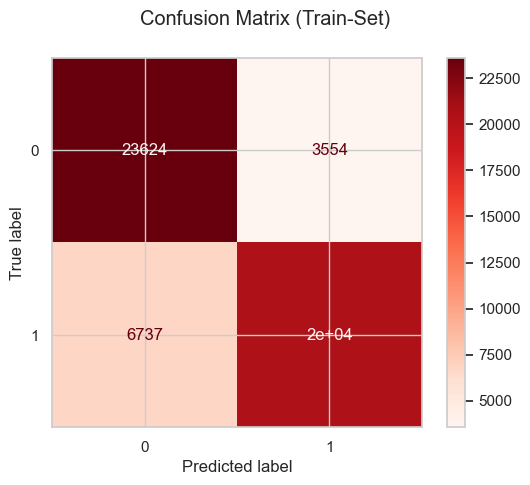

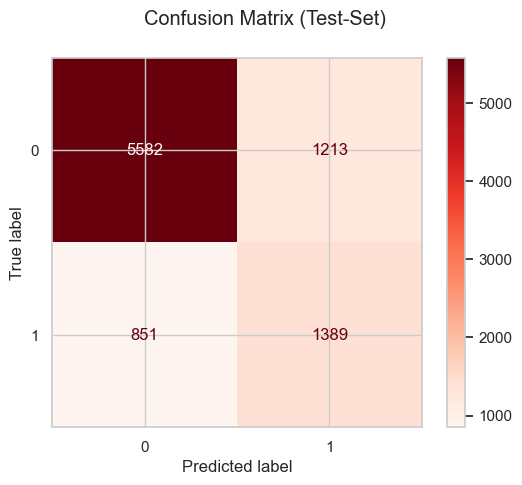

In [74]:
# Check Performance Model against Train-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model Support Vector Machine (SVM)
knn_pipeline_predict_train = knn_pipeline.predict(X_train_balanced)

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report (Train-Set): \n', classification_report(y_train_balanced_encoded, knn_pipeline_predict_train), '\n')

# Menampilkan Confusion Matrix pada dataset pelatihan
disp_train = ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_train_balanced, y_train_balanced_encoded, cmap='Reds')
disp_train.figure_.suptitle("Confusion Matrix (Train-Set)")

print('\n')

# Check Performance Model against Test-Set

# Melakukan prediksi pada dataset uji menggunakan model Support Vector Machine (SVM)
knn_pipeline_predict_test = knn_pipeline.predict(X_test)

# Menampilkan Classification Report pada dataset uji
print('Classification Report (Test-Set): \n', classification_report(y_test_encoded, knn_pipeline_predict_test), '\n')

# Menampilkan Confusion Matrix pada dataset uji
disp_test = ConfusionMatrixDisplay.from_estimator(knn_pipeline, X_test, y_test_encoded, cmap='Reds')
disp_test.figure_.suptitle("Confusion Matrix (Test-Set)")

##### **8.1.2. SVM Baseline Model Evaluation**

Classification Report (Train-Set): 
               precision    recall  f1-score   support

           0       0.86      0.73      0.79     27178
           1       0.77      0.88      0.82     27178

    accuracy                           0.81     54356
   macro avg       0.81      0.81      0.81     54356
weighted avg       0.81      0.81      0.81     54356
 



Classification Report (Test-Set): 
               precision    recall  f1-score   support

           0       0.94      0.73      0.82      6795
           1       0.51      0.86      0.64      2240

    accuracy                           0.76      9035
   macro avg       0.73      0.79      0.73      9035
weighted avg       0.83      0.76      0.78      9035
 



Text(0.5, 0.98, 'Confusion Matrix (Test-Set)')

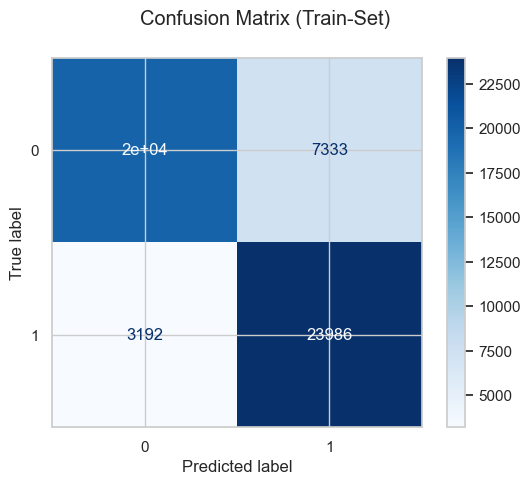

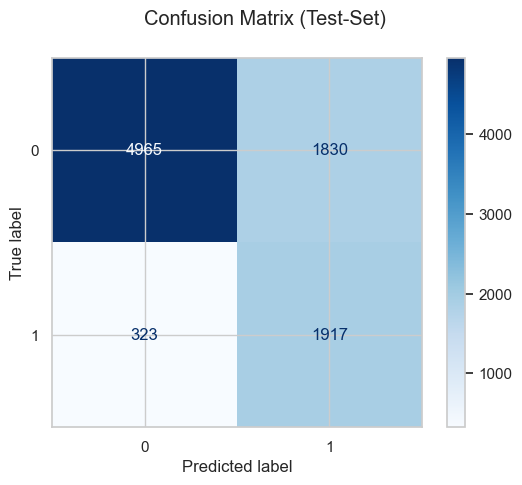

In [75]:
# Check Performance Model against Train-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model Support Vector Machine (SVM)
svm_pipeline_predict_train = svm_pipeline.predict(X_train_balanced)

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report (Train-Set): \n', classification_report(y_train_balanced_encoded, svm_pipeline_predict_train), '\n')

# Menampilkan Confusion Matrix pada dataset pelatihan
disp_train = ConfusionMatrixDisplay.from_estimator(svm_pipeline, X_train_balanced, y_train_balanced_encoded, cmap='Blues')
disp_train.figure_.suptitle("Confusion Matrix (Train-Set)")

print('\n')

# Check Performance Model against Test-Set

# Melakukan prediksi pada dataset uji menggunakan model Support Vector Machine (SVM)
svm_pipeline_predict_test = svm_pipeline.predict(X_test)

# Menampilkan Classification Report pada dataset uji
print('Classification Report (Test-Set): \n', classification_report(y_test_encoded, svm_pipeline_predict_test), '\n')

# Menampilkan Confusion Matrix pada dataset uji
disp_test = ConfusionMatrixDisplay.from_estimator(svm_pipeline, X_test, y_test_encoded, cmap='Blues')
disp_test.figure_.suptitle("Confusion Matrix (Test-Set)")

##### **8.1.3. Decision Tree Baseline Model Evaluation**

Classification Report (Train-Set): 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88     27178
           1       0.86      0.92      0.89     27178

    accuracy                           0.89     54356
   macro avg       0.89      0.89      0.88     54356
weighted avg       0.89      0.89      0.88     54356
 



Classification Report (Test-Set): 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      6795
           1       0.51      0.69      0.59      2240

    accuracy                           0.76      9035
   macro avg       0.70      0.73      0.71      9035
weighted avg       0.79      0.76      0.77      9035
 



Text(0.5, 0.98, 'Confusion Matrix (Test-Set)')

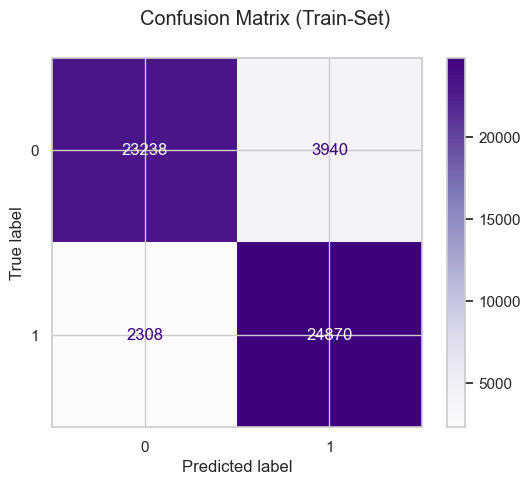

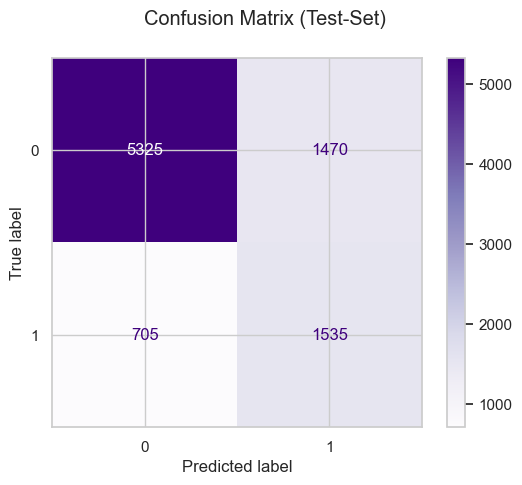

In [76]:
# Check Performance Model against Train-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model Support Vector Machine (SVM)
desctree_pipeline_predict_train = desctree_pipeline.predict(X_train_balanced)

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report (Train-Set): \n', classification_report(y_train_balanced_encoded, desctree_pipeline_predict_train), '\n')

# Menampilkan Confusion Matrix pada dataset pelatihan
disp_train = ConfusionMatrixDisplay.from_estimator(desctree_pipeline, X_train_balanced, y_train_balanced_encoded, cmap='Purples')
disp_train.figure_.suptitle("Confusion Matrix (Train-Set)")

print('\n')

# Check Performance Model against Test-Set

# Melakukan prediksi pada dataset uji menggunakan model Support Vector Machine (SVM)
desctree_pipeline_predict_test = desctree_pipeline.predict(X_test)

# Menampilkan Classification Report pada dataset uji
print('Classification Report (Test-Set): \n', classification_report(y_test_encoded, desctree_pipeline_predict_test), '\n')

# Menampilkan Confusion Matrix pada dataset uji
disp_test = ConfusionMatrixDisplay.from_estimator(desctree_pipeline, X_test, y_test_encoded, cmap='Purples')
disp_test.figure_.suptitle("Confusion Matrix (Test-Set)")

##### **8.1.4. Random Forest Baseline Model Evaluation**

Classification Report (Train-Set): 
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     27178
           1       0.85      0.93      0.89     27178

    accuracy                           0.89     54356
   macro avg       0.89      0.89      0.88     54356
weighted avg       0.89      0.89      0.88     54356
 



Classification Report (Test-Set): 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      6795
           1       0.51      0.69      0.59      2240

    accuracy                           0.76      9035
   macro avg       0.70      0.73      0.71      9035
weighted avg       0.79      0.76      0.77      9035
 



Text(0.5, 0.98, 'Confusion Matrix (Test-Set)')

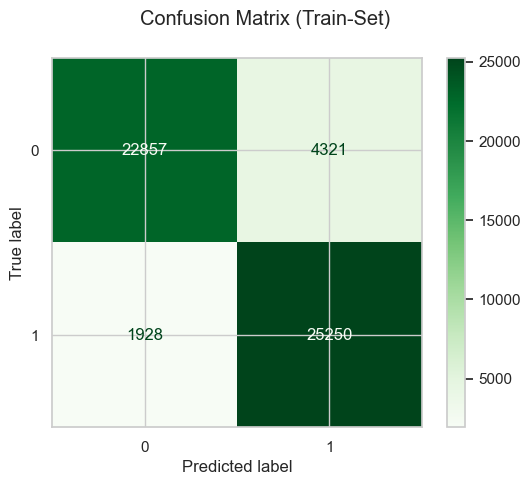

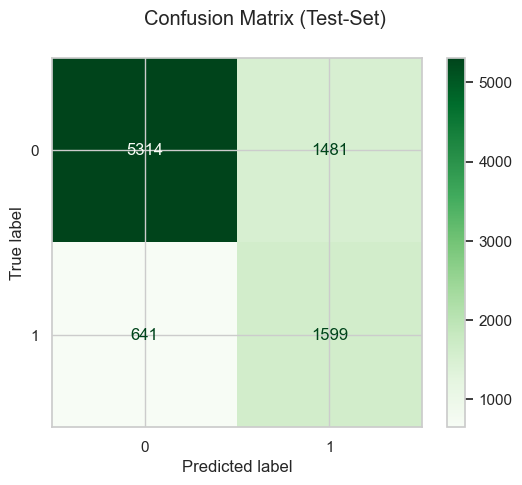

In [77]:
# Check Performance Model against Train-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model Support Vector Machine (SVM)
randmfrst_pipeline_predict_train = randmfrst_pipeline.predict(X_train_balanced)

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report (Train-Set): \n', classification_report(y_train_balanced_encoded, randmfrst_pipeline_predict_train), '\n')

# Menampilkan Confusion Matrix pada dataset pelatihan
disp_train = ConfusionMatrixDisplay.from_estimator(randmfrst_pipeline, X_train_balanced, y_train_balanced_encoded, cmap='Greens')
disp_train.figure_.suptitle("Confusion Matrix (Train-Set)")

print('\n')

# Check Performance Model against Test-Set

# Melakukan prediksi pada dataset uji menggunakan model Support Vector Machine (SVM)
randmfrst_pipeline_predict_test = randmfrst_pipeline.predict(X_test)

# Menampilkan Classification Report pada dataset uji
print('Classification Report (Test-Set): \n', classification_report(y_test_encoded, desctree_pipeline_predict_test), '\n')

# Menampilkan Confusion Matrix pada dataset uji
disp_test = ConfusionMatrixDisplay.from_estimator(randmfrst_pipeline, X_test, y_test_encoded, cmap='Greens')
disp_test.figure_.suptitle("Confusion Matrix (Test-Set)")

##### **8.1.5. AdaBoost Baseline Model Evaluation**

Classification Report (Train-Set): 
               precision    recall  f1-score   support

           0       0.83      0.76      0.79     27178
           1       0.78      0.84      0.81     27178

    accuracy                           0.80     54356
   macro avg       0.80      0.80      0.80     54356
weighted avg       0.80      0.80      0.80     54356
 



Classification Report (Test-Set): 
               precision    recall  f1-score   support

           0       0.92      0.76      0.84      6795
           1       0.53      0.81      0.64      2240

    accuracy                           0.77      9035
   macro avg       0.73      0.79      0.74      9035
weighted avg       0.83      0.77      0.79      9035
 



Text(0.5, 0.98, 'Confusion Matrix (Test-Set)')

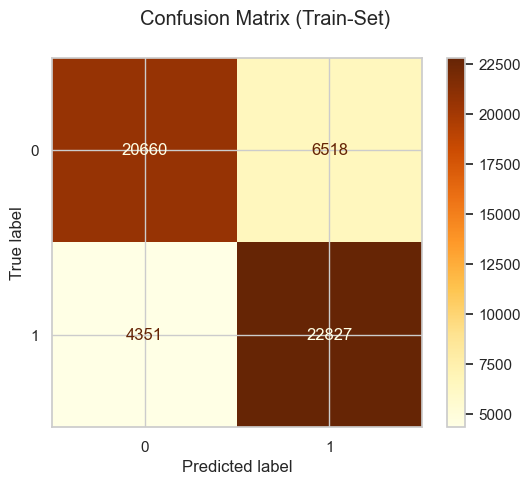

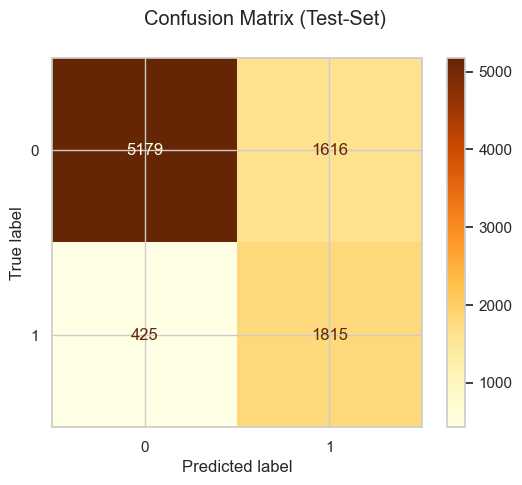

In [78]:
# Check Performance Model against Train-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model Support Vector Machine (SVM)
adaboost_pipeline_predict_train = adaboost_pipeline.predict(X_train_balanced)

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report (Train-Set): \n', classification_report(y_train_balanced_encoded, adaboost_pipeline_predict_train), '\n')

# Menampilkan Confusion Matrix pada dataset pelatihan
disp_train = ConfusionMatrixDisplay.from_estimator(adaboost_pipeline, X_train_balanced, y_train_balanced_encoded, cmap='YlOrBr')
disp_train.figure_.suptitle("Confusion Matrix (Train-Set)")

print('\n')

# Check Performance Model against Test-Set

# Melakukan prediksi pada dataset uji menggunakan model Support Vector Machine (SVM)
adaboost_pipeline_predict_test = adaboost_pipeline.predict(X_test)

# Menampilkan Classification Report pada dataset uji
print('Classification Report (Test-Set): \n', classification_report(y_test_encoded, adaboost_pipeline_predict_test), '\n')

# Menampilkan Confusion Matrix pada dataset uji
disp_test = ConfusionMatrixDisplay.from_estimator(adaboost_pipeline, X_test, y_test_encoded, cmap='YlOrBr')
disp_test.figure_.suptitle("Confusion Matrix (Test-Set)")

### **8.2. Hyperparameter Tuning**

Hyperparameter tuning adalah proses mengoptimalkan nilai-nilai yang ditentukan sebelumnya (hyperparameter) pada model machine learning untuk mencapai performa yang lebih baik.

Hyperparameter adalah parameter yang tidak dapat dipelajari oleh model selama pelatihan, dan memilih nilai yang tepat untuk hyperparameter dapat menghasilkan model yang lebih akurat dan efisien.

Dengan melakukan hyperparameter tuning, kita dapat meningkatkan kemampuan model untuk melakukan prediksi dengan lebih baik, mengurangi overfitting atau underfitting, dan meningkatkan kinerja secara keseluruhan.

Berikut kita akan memulai dengan mendefinisikan hyperparameter.

Kita akan menggunakan Randomized Search Cross Validation karena menjamin eksplorasi menyeluruh dari ruang hyperparameter.

In [79]:
# Tentukan grid hyperparameter untuk Random Forest
param_distributions_rf = {
    'randomforestclassifier__n_estimators': [50, 100, 200],
    'randomforestclassifier__max_depth': [None, 10, 20, 30],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 4],
    'randomforestclassifier__bootstrap': [True, False]
}

# Buat objek RandomizedSearchCV untuk Random Forest
random_search_rf = RandomizedSearchCV(estimator=randmfrst_pipeline, param_distributions=param_distributions_rf, scoring='recall', cv=3, n_jobs=-1, n_iter=5, random_state=42)

# Fit random search ke data untuk Random Forest
random_search_rf.fit(X_train_balanced, y_train_balanced_encoded)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'hours-per-week']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(),
                                                                               ['workclass',
                                                                                'marital-status',
                                                                                'occupation',
                                                                                'sex',
                                                                                'native-continent']),
                                                                              ('ordinalencoder',
                                                                               OrdinalEncoder(categories=[['Low_Educatio...
                                                                     random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'randomforestclassifier__bootstrap': [True,
                                                                              False],
                                        'randomforestclassifier__max_depth': [None,
                                                                              10,
                                                                              20,
                                                                              30],
                                        'randomforestclassifier__min_samples_leaf': [1,
                                                                                     2,
                                                                                     4],
                                        'randomforestclassifier__min_samples_split': [2,
                                                                                      5,
                                                                                      10],
                                        'randomforestclassifier__n_estimators': [50,
                                                                                 100,
                                                                                 200]},
                   random_state=42, scoring='recall')

Setelah itu, kita akan melihat dari hyperparameter terbaik dari seluruh pilihan hyperparameter yang telah kita berikan sebelunya.

In [80]:
# Cetak hyperparameter terbaik
print("Best Hyperparameters:", random_search_rf.best_params_)

Best Hyperparameters: {'randomforestclassifier__n_estimators': 50, 'randomforestclassifier__min_samples_split': 5, 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__max_depth': 10, 'randomforestclassifier__bootstrap': False}


Setelah mengetahui hyperparameter terbaik, selanjutnya kita akan membuat model dengan hyperparameter terbaik.

In [81]:
# Dapatkan model terbaik
best_model = random_search_rf.best_estimator_

In [82]:
# Mendapatkan langkah (step) khusus dalam pipeline yang merupakan model Random Forest
best_model.named_steps['randomforestclassifier']

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_split=5,
                       n_estimators=50, n_jobs=-1, random_state=42)

Selanjutnya, kita akan evaluasi hasil implementasi Hyperparamter Tuning terhadap Model Baseline Random Forest kita.

In [83]:
# Evaluasi model terbaik menggunakan cross-validation
recall_score_cv = cross_val_score(best_model, X_train_balanced, y_train_balanced_encoded, cv=3, scoring='recall')

In [84]:
# Cetak skor F1 hasil cross-validation
print("Cross-validated Recall Scores:", recall_score_cv)
print("Mean Recall Score:", recall_score_cv.mean())
print("Standard Deviation of Recall Scores:", recall_score_cv.std())

Cross-validated Recall Scores: [0.85638591 0.89370861 0.8917099 ]
Mean Recall Score: 0.8806014751955965
Standard Deviation of Recall Scores: 0.017142417966403967


Dari hasil Cross Validation yang telah kita lakukan, kita mendapati bahwa Recall kita mengalami peningkatan dimana yang sebelumnya score mean Recallnya adalah 0.8696359065795556 menjadi 0.8806014751955965.

Selanjtunya kita akan melakukan evaulasi kembali namun menggunakan Classification Report.

Classification Report (Train-Set): 
               precision    recall  f1-score   support

           0       0.87      0.74      0.80     27178
           1       0.77      0.89      0.83     27178

    accuracy                           0.82     54356
   macro avg       0.82      0.82      0.81     54356
weighted avg       0.82      0.82      0.81     54356
 



Classification Report (Test-Set): 
               precision    recall  f1-score   support

           0       0.94      0.73      0.82      6795
           1       0.51      0.85      0.64      2240

    accuracy                           0.76      9035
   macro avg       0.72      0.79      0.73      9035
weighted avg       0.83      0.76      0.78      9035
 



Text(0.5, 0.98, 'Confusion Matrix (Test-Set)')

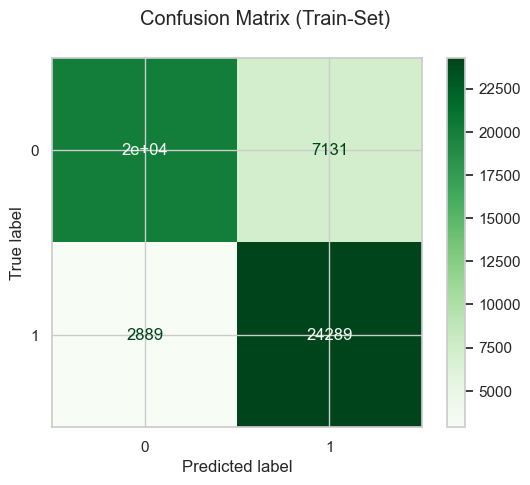

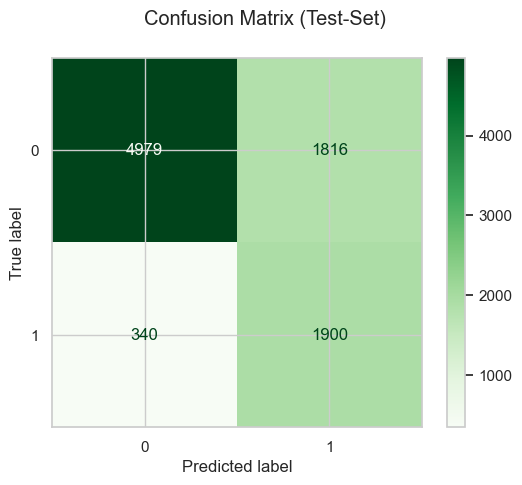

In [85]:
# Check Performance Model against Train-Set

# Melakukan prediksi pada dataset pelatihan menggunakan model Support Vector Machine (SVM)
best_model_predict_train = best_model.predict(X_train_balanced)

# Menampilkan Classification Report pada dataset pelatihan
print('Classification Report (Train-Set): \n', classification_report(y_train_balanced_encoded, best_model_predict_train), '\n')

# Menampilkan Confusion Matrix pada dataset pelatihan
disp_train = ConfusionMatrixDisplay.from_estimator(best_model, X_train_balanced, y_train_balanced_encoded, cmap='Greens')
disp_train.figure_.suptitle("Confusion Matrix (Train-Set)")

print('\n')

# Check Performance Model against Test-Set

# Melakukan prediksi pada dataset uji menggunakan model Support Vector Machine (SVM)
best_model_predict_test = best_model.predict(X_test)

# Menampilkan Classification Report pada dataset uji
print('Classification Report (Test-Set): \n', classification_report(y_test_encoded, best_model_predict_test), '\n')

# Menampilkan Confusion Matrix pada dataset uji
disp_test = ConfusionMatrixDisplay.from_estimator(best_model, X_test, y_test_encoded, cmap='Greens')
disp_test.figure_.suptitle("Confusion Matrix (Test-Set)")

In [86]:
# Save Classification Report into a Dictionary

all_reports = {}
def performance_report(all_reports, y_train_balanced_encoded, y_pred_train, y_test_encoded, y_pred_test, name):
  score_reports = {
      'train - precision' : precision_score(y_train_balanced_encoded, y_pred_train),
      'train - recall' : recall_score(y_train_balanced_encoded, y_pred_train),
      # 'train - accuracy' : accuracy_score(y_train, y_pred_train),
      'train - f1_score' : f1_score(y_train_balanced_encoded, y_pred_train),
      'test - precision' : precision_score(y_test_encoded, y_pred_test),
      'test - recall' : recall_score(y_test_encoded, y_pred_test),
      # 'test - accuracy_score' : accuracy_score(y_test, y_pred_test),
      'test - f1_score' : f1_score(y_test_encoded, y_pred_test),
  }
  all_reports[name] = score_reports
  return all_reports

all_reports = performance_report(all_reports, y_train_balanced_encoded, best_model_predict_train, y_test_encoded, best_model_predict_test, 'Random Search')
pd.DataFrame(all_reports)

,Random Search
test - f1_score,0.638012
test - precision,0.511302
test - recall,0.848214
train - f1_score,0.829004
train - precision,0.773043
train - recall,0.893701


In [87]:
all_reports

{'Random Search': {'train - precision': 0.7730426479949077,
  'train - recall': 0.8937007874015748,
  'train - f1_score': 0.8290044028806444,
  'test - precision': 0.511302475780409,
  'test - recall': 0.8482142857142857,
  'test - f1_score': 0.6380120886501007}}

Dari hasil pengecekan best model yang berdasar dari random forest, kita menemukan adanya peningkatan perfroma model.

Dari yang sebelumnya Overfitting (Train-0.93/Test-0.69) menjadi Goodfitting (Train-0.89/Test-0.85).

Oleh karena itu, kita akan menggunakan Random Forest yang sudah kita Hyperparameter Tuning (Best Model)

---
## **10. Model Saving**

Setelah mendapatkan model terbaik, selanjutnya kita akan melakukan penyimpanan model yang telah kita buat.

In [88]:
# Menyimpan model Logistic Regression ke dalam file pickle
with open('model.pkl', 'wb') as file_1:
  pickle.dump(best_model, file_1)

---
## **11. Model Inference**

Model Inference dilakukan di notebook lain (P1M2_michael_nathaniel_inf.ipynb)

---
## **12. Pengambilan Kesimpulan**

Untuk melakukan prediksi klasifikasi apakah income seseorang dibawah sama dengan atau diatas $50.000 per tahun, kita akan menggunakan model `Random Forest yang di optimisasi menggunakan Hyperparameter Tuning`. Pada model, mereka yang penghasilannya berada `di bawah atau sama dengan|$50.000 per tahun ditandai dengan '0'`, sedangkan yang penghasilannya `diatas $50.000 per tahun ditandai dengan '1'`.

Dari hasil pengujian, model SVM memiliki hasil prediksi yang sedikit lebih baik dari pada Random Forest, diikuti oleh Decision Tree, AdaBoost, dan KNN. Namun, alasan kita tetap `menggunakan Random Forest sebagai model utama kita adalah karena SVM memerlukan resources yang lebih banyak dan memakan waktu yang sangat panjang` dalam memproses data sebesar 40.000++.

Selama proses EDA, kita temukan bahwa pada umumnya mereka yang memiliki penghasilan diatas $50.000 per tahunnya memiliki karakteristik sebagai berikut:
- Berusia 36-65 tahun.
- Memiliki status kelas pekerja seperti Private Sector dan Self-Emp-Inc.
- Memiliki pekerjaan seperti Executive Managerial dan Profesional Speciality.
- Berjenis kelamin pria.
- Bekerja 41-60 jam dalam seminggu.